In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
pd.set_option("display.max_rows",100) 
warnings.filterwarnings("ignore") 
from colorama import Fore
from sklearn.preprocessing import LabelEncoder 
from factor_analyzer import FactorAnalyzer 
from scipy import stats

In [2]:
data=pd.read_csv("PEP1.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 81)

## geting the total null values in the column


In [5]:
data.isnull().sum().sort_values(ascending=False).head(81)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functiol            0
Fireplaces          0
KitchenQual         0
KitchebvGr          0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

## getting the unique values in the datasets

In [6]:
data.select_dtypes(exclude=np.number).nunique().sort_values(ascending=True)

Street            2
Alley             2
CentralAir        2
Utilities         2
LandSlope         3
PoolQC            3
PavedDrive        3
GarageFinish      3
BsmtQual          4
ExterQual         4
MasVnrType        4
KitchenQual       4
BsmtCond          4
BsmtExposure      4
Fence             4
MiscFeature       4
LandContour       4
LotShape          4
FireplaceQu       5
Electrical        5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
BldgType          5
ExterCond         5
BsmtFinType1      6
RoofStyle         6
GarageType        6
Foundation        6
Heating           6
BsmtFinType2      6
SaleCondition     6
Functiol          7
RoofMatl          8
HouseStyle        8
Condition2        8
SaleType          9
Condition1        9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

## seprating the numarical values from the dataset

In [7]:
num=data.select_dtypes(include=np.number)
num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


## seprating the catogerical values from the dataset

In [8]:
cato=data.select_dtypes(exclude=np.number)
cato.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## Missing value treatment for numerical variables

In [9]:
num.isnull().sum().sort_values(ascending=False).head()

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
Id               0
OpenPorchSF      0
dtype: int64

## treating null vaules in numerical dataset using mean

In [10]:
num["LotFrontage"]=num["LotFrontage"].fillna(data.groupby("Neighborhood")["LotFrontage"].transform("mean"))

In [11]:
#cheking the distribution whether is there any huge data change by compairing
# with stock dataset and our null value treated data sets

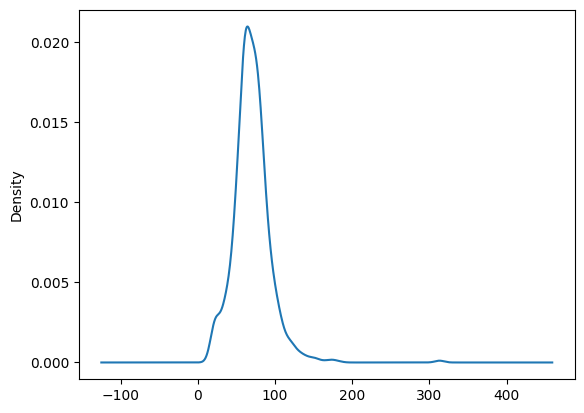

<Axes: ylabel='Density'>

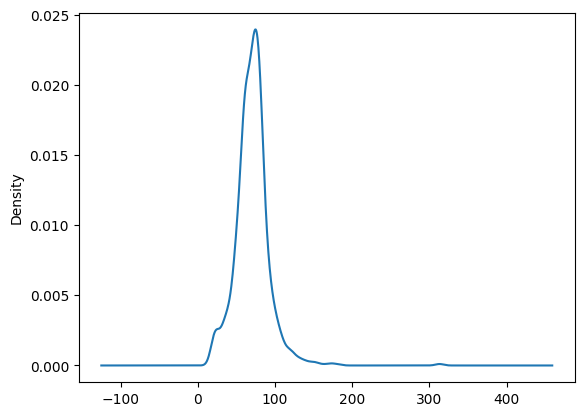

In [12]:
data["LotFrontage"].plot(kind="kde")
plt.show()
num["LotFrontage"].plot(kind="kde")

In [13]:
# for column GarageYrBlt and MasVnrArea null value treatment

<Axes: ylabel='Density'>

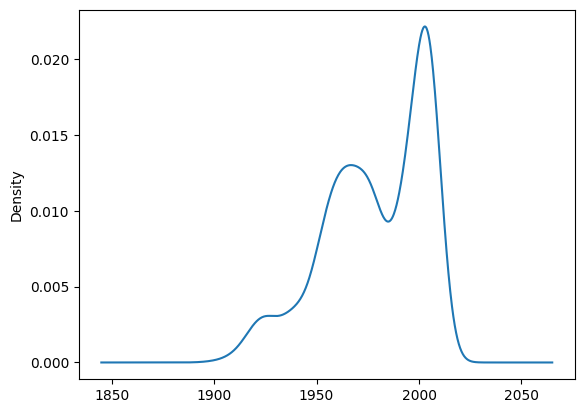

In [14]:
num["GarageYrBlt"].plot(kind="kde")

In [15]:
num["GarageYrBlt"]=num["GarageYrBlt"].fillna(data.groupby("YearBuilt")["GarageYrBlt"].transform("mean"))

<Axes: ylabel='Density'>

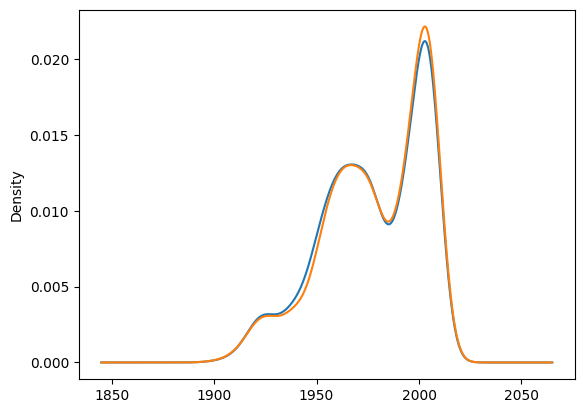

In [16]:
num["GarageYrBlt"]=num["GarageYrBlt"].fillna(data.groupby("YearRemodAdd")["GarageYrBlt"].transform("mean"))
num["GarageYrBlt"].plot(kind="kde")
data["GarageYrBlt"].plot(kind="kde")

In [17]:
num.isnull().sum().sort_values(ascending=False).head()

MasVnrArea      8
Id              0
OpenPorchSF     0
KitchebvGr      0
TotRmsAbvGrd    0
dtype: int64

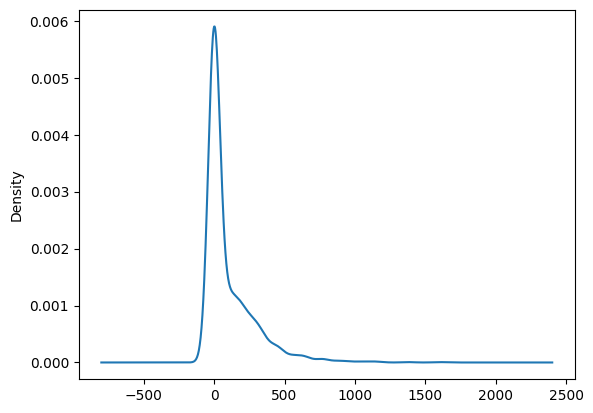

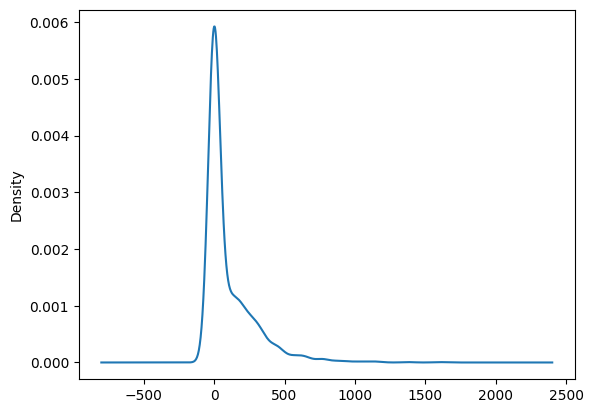

In [18]:
num["MasVnrArea"]=num["MasVnrArea"].fillna(data.groupby("OverallQual")["MasVnrArea"].transform("mean"))
num["MasVnrArea"].plot(kind="kde")
plt.show()
data["MasVnrArea"].plot(kind="kde")
plt.show()

In [19]:
num.isnull().sum().sort_values(ascending=False).head()

Id              0
WoodDeckSF      0
BedroomAbvGr    0
KitchebvGr      0
TotRmsAbvGrd    0
dtype: int64

In [20]:
 #NOW ALL THE NUMERICAL NULL VALUES ARE TREATED WITHOUT ANY HUGE DATA CHANGE

## here we see the skew values and the distribution of all the nu- merical column

In [21]:
# now cheking the distribution and skew values with for loop and
# for  the distribultion we are using seaborn's distplot

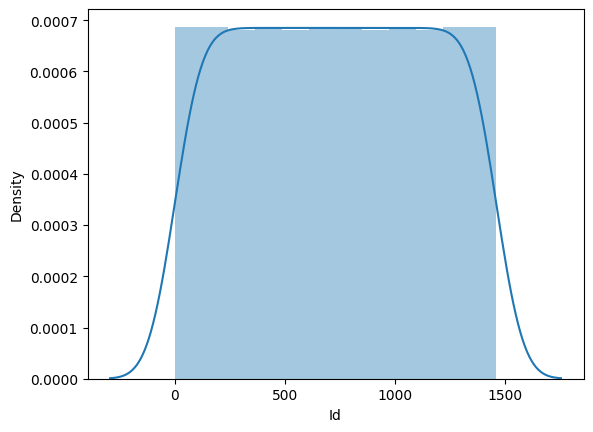

the skew value for columns  Id is 0.0


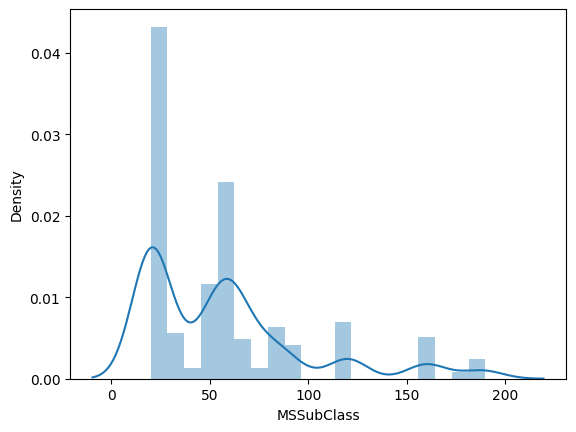

the skew value for columns  MSSubClass is 1.4076567471495591


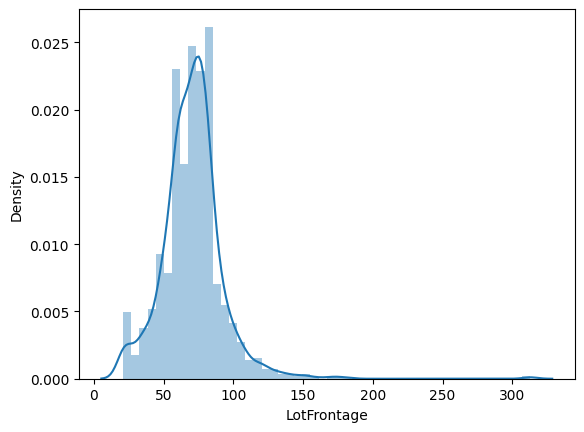

the skew value for columns  LotFrontage is 2.161425275524561


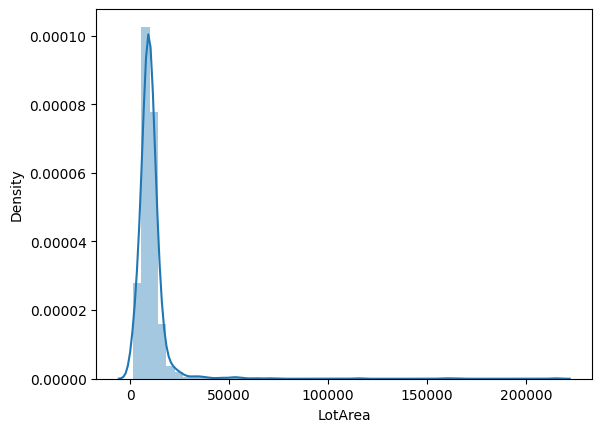

the skew value for columns  LotArea is 12.207687851233496


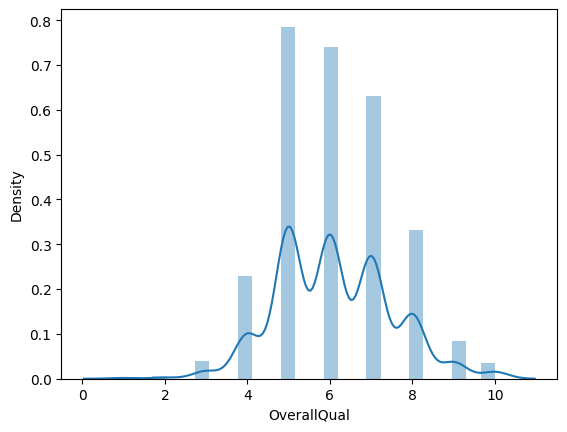

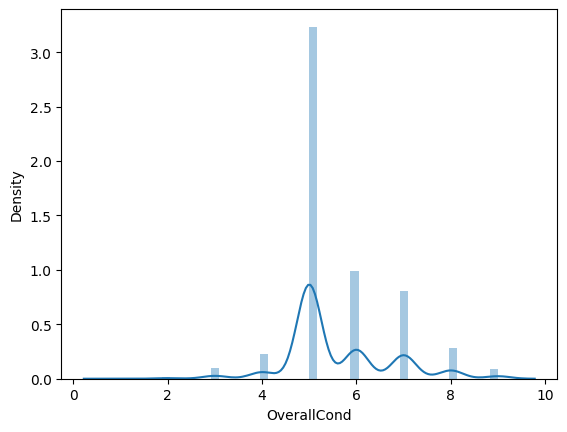

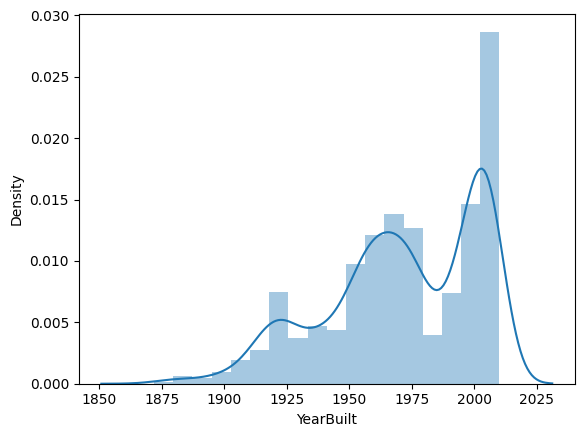

the skew value for columns  YearBuilt is -0.613461172488183


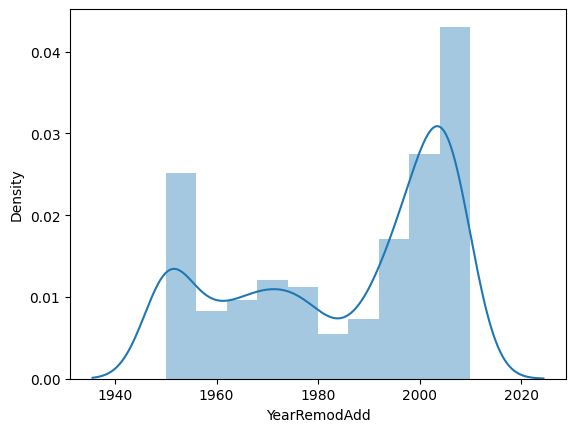

the skew value for columns  YearRemodAdd is -0.5035620027004709


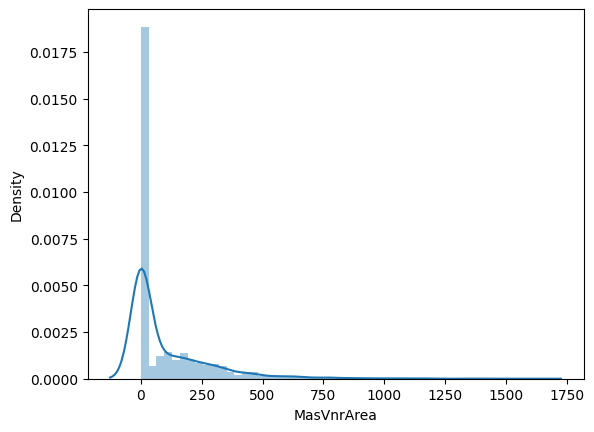

the skew value for columns  MasVnrArea is 2.6629791220869157


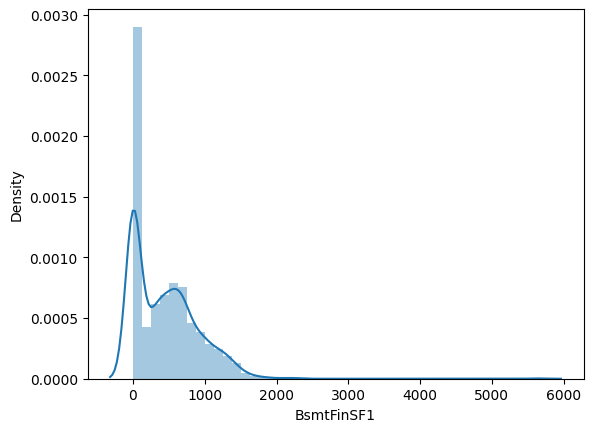

the skew value for columns  BsmtFinSF1 is 1.685503071910789


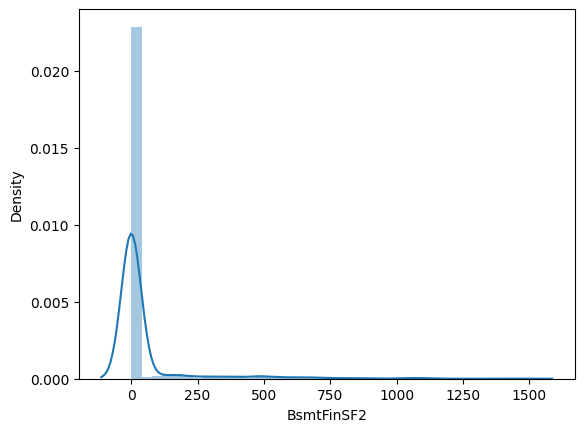

the skew value for columns  BsmtFinSF2 is 4.255261108933303


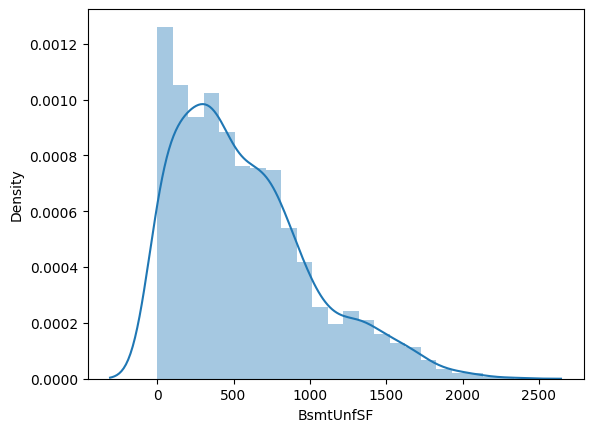

the skew value for columns  BsmtUnfSF is 0.9202684528039037


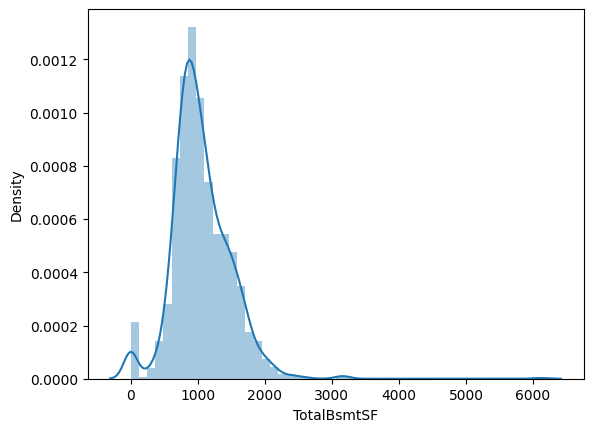

the skew value for columns  TotalBsmtSF is 1.5242545490627664


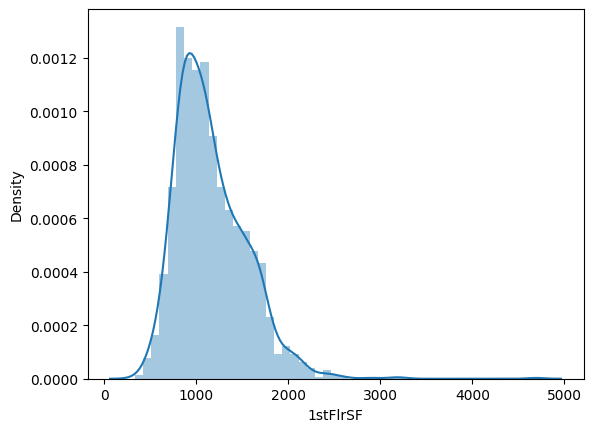

the skew value for columns  1stFlrSF is 1.3767566220336365


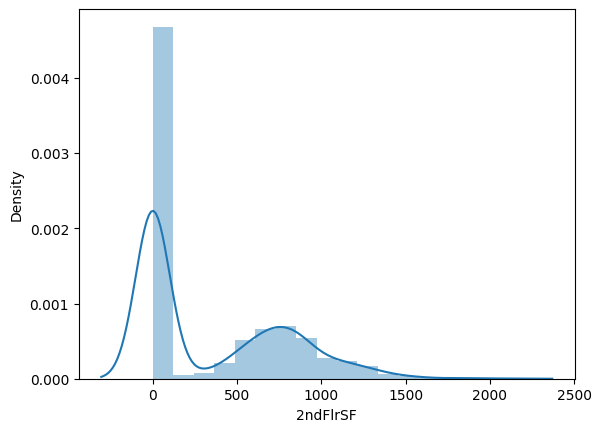

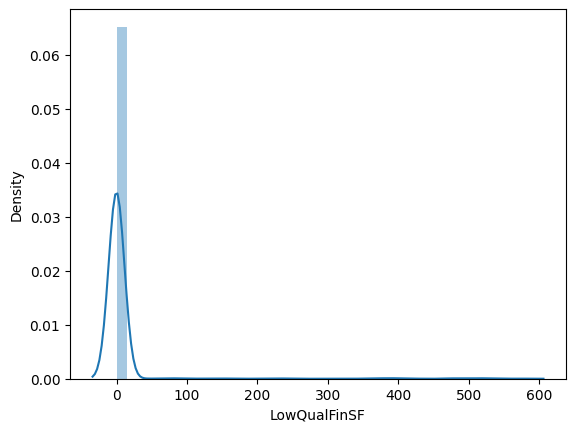

the skew value for columns  LowQualFinSF is 9.011341288465387


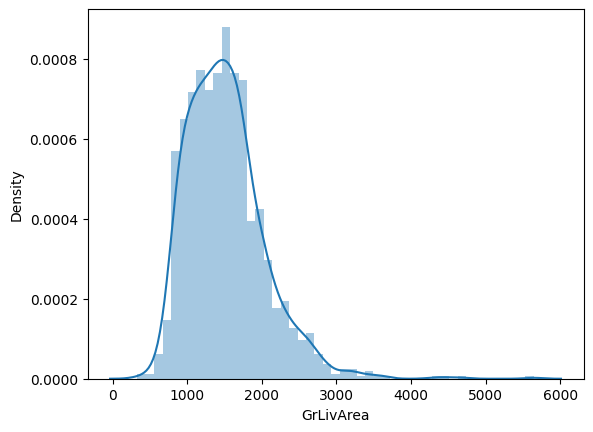

the skew value for columns  GrLivArea is 1.3665603560164552


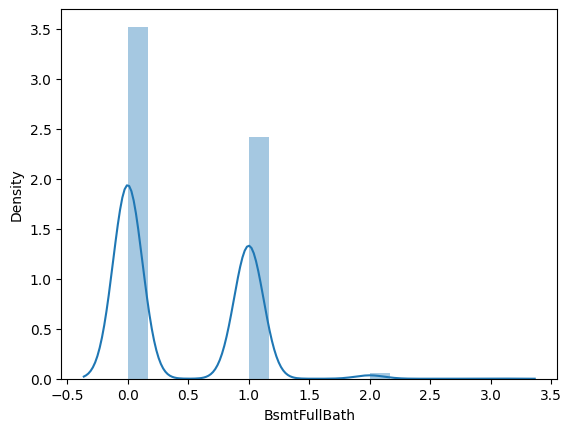

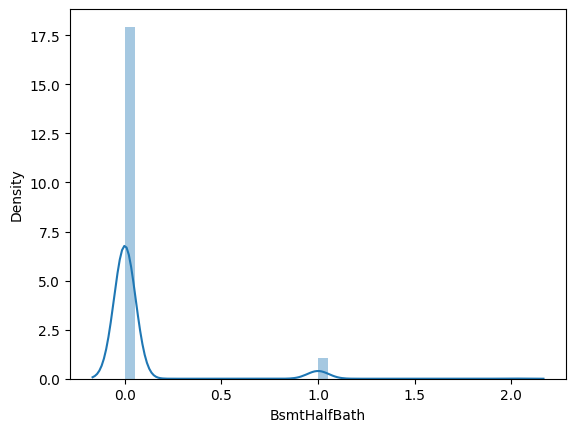

the skew value for columns  BsmtHalfBath is 4.103402697955168


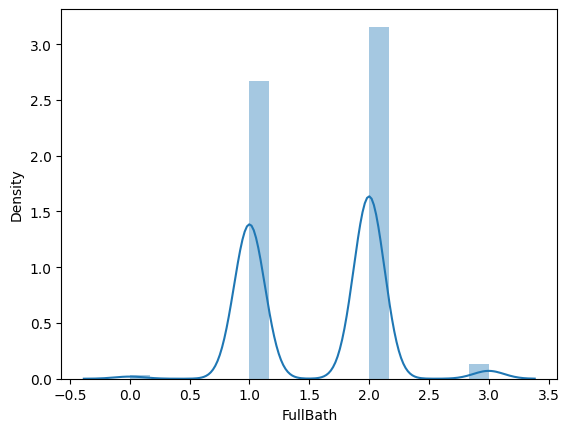

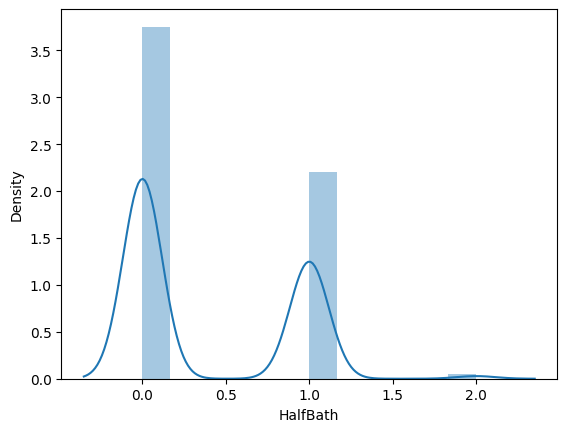

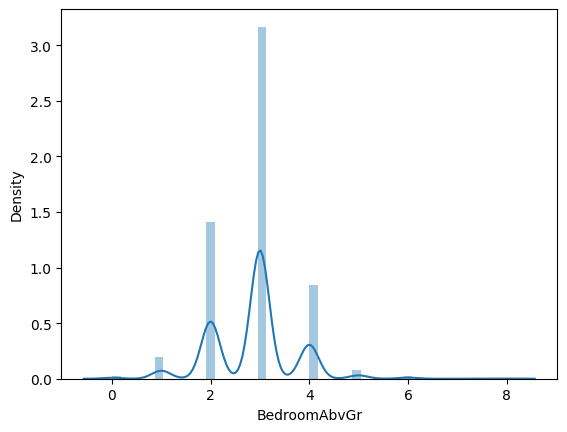

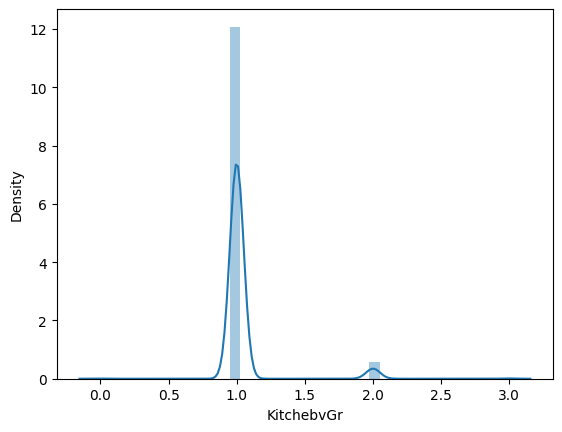

the skew value for columns  KitchebvGr is 4.488396777072859


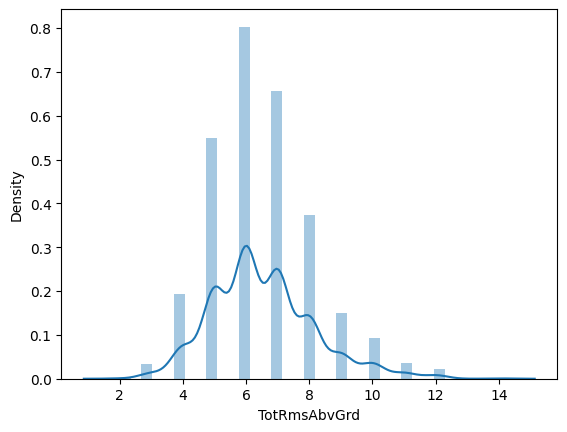

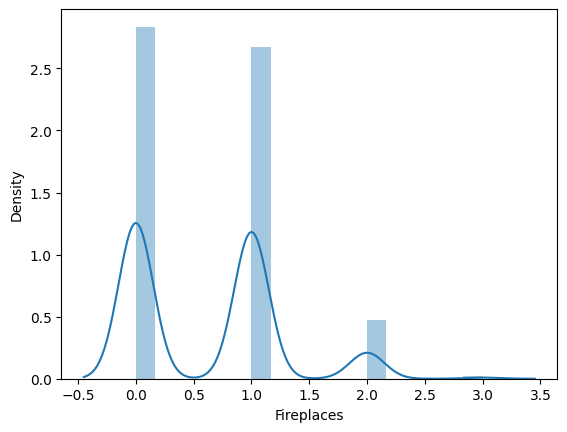

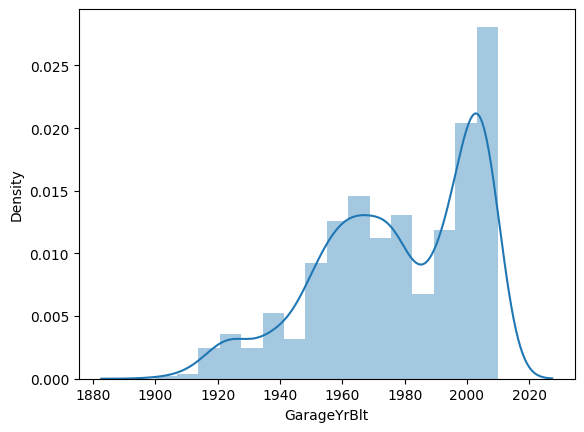

the skew value for columns  GarageYrBlt is -0.5706583291331109


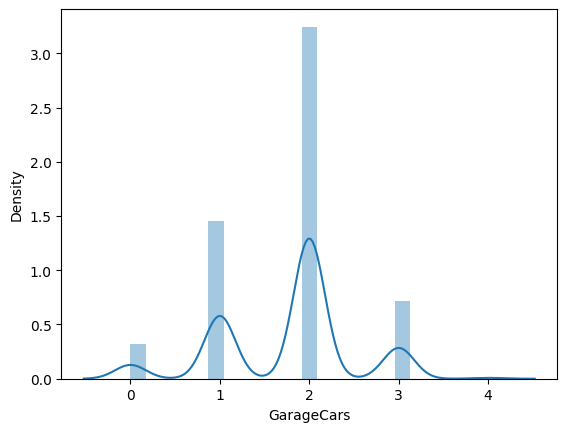

the skew value for columns  GarageCars is -0.3425489297486655


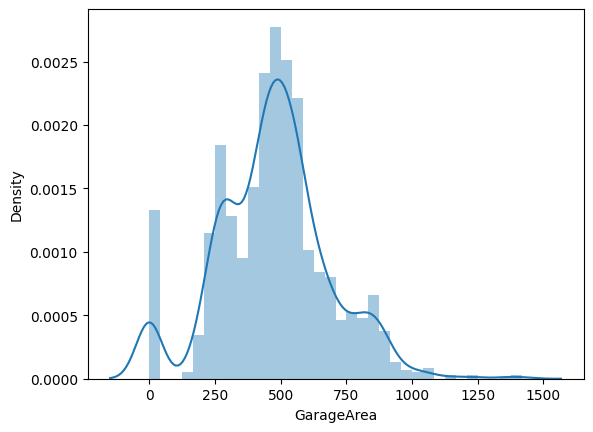

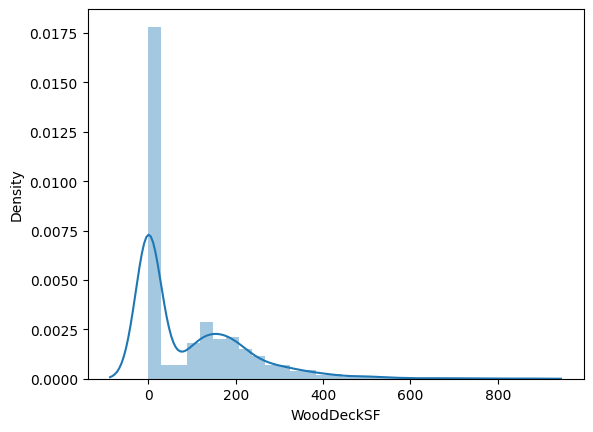

the skew value for columns  WoodDeckSF is 1.5413757571931312


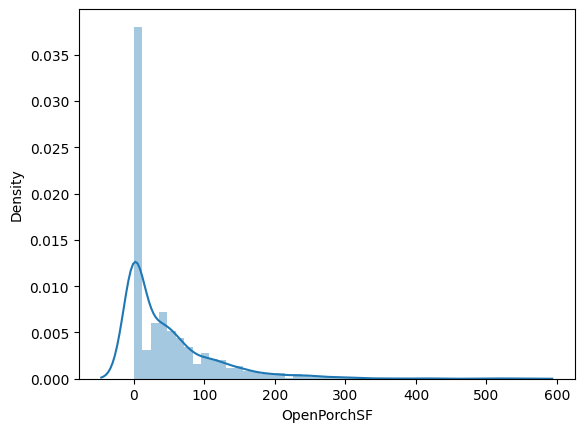

the skew value for columns  OpenPorchSF is 2.3643417403694404


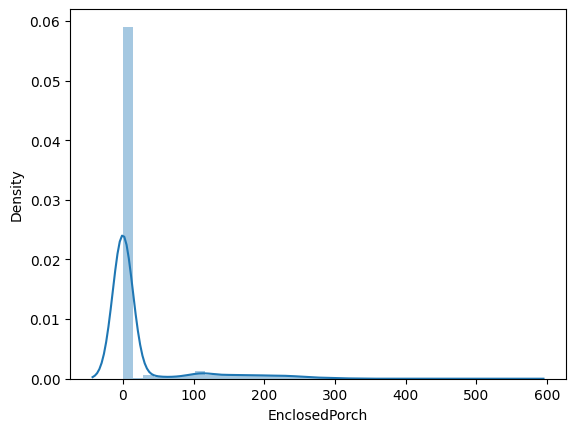

the skew value for columns  EnclosedPorch is 3.08987190371177


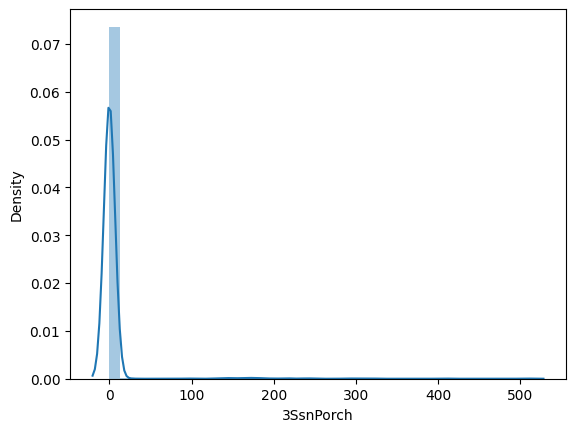

the skew value for columns  3SsnPorch is 10.304342032693112


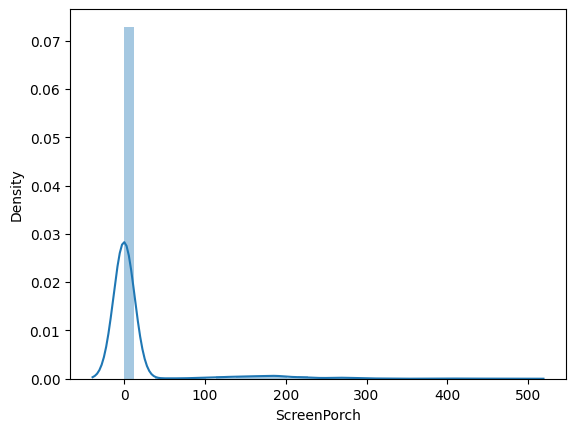

the skew value for columns  ScreenPorch is 4.122213743143115


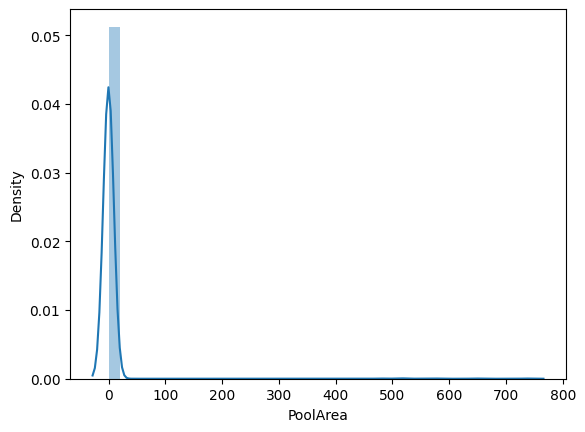

the skew value for columns  PoolArea is 14.828373640750588


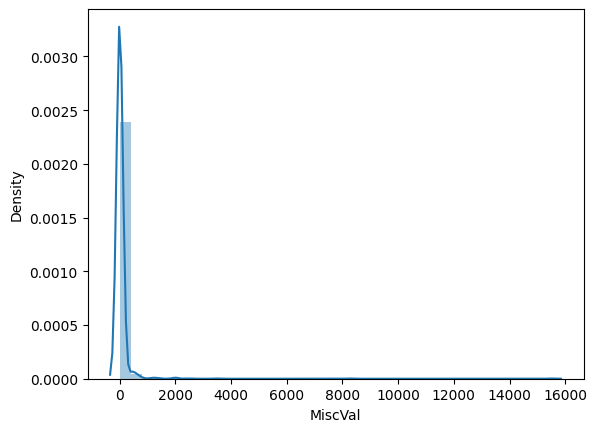

the skew value for columns  MiscVal is 24.476794188821916


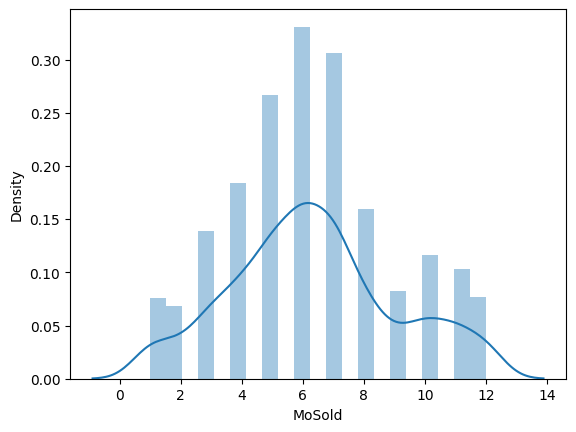

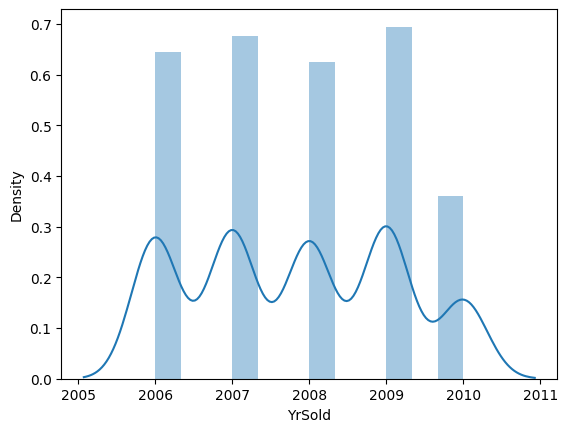

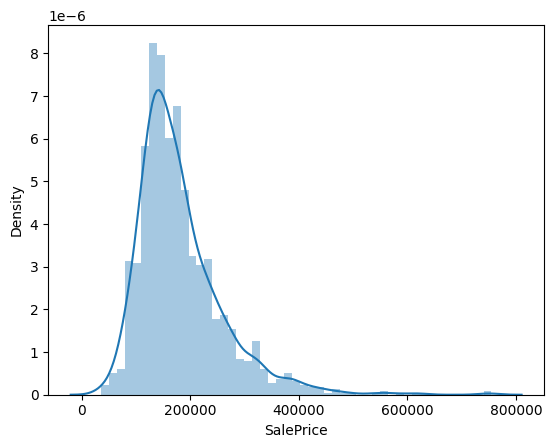

the skew value for columns  SalePrice is 1.8828757597682129


In [22]:
# using for loop to see the distribution of all the numerical colums
for i in num.columns: 
    sns.distplot(num[i]) 
    sk=num[i].skew() 
    plt.show()
    if sk == 0:
        print(Fore.GREEN + "the skew value for columns ",i,"is",sk)
    elif sk >=0.9:
        print(Fore.RED + "the skew value for columns ",i,"is",sk)
    elif sk <=0:
        print(Fore.BLUE + "the skew value for columns ",i,"is",sk)

In [23]:
corl=num.corr()
corl=corl.style.background_gradient(cmap='coolwarm')
corl

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchebvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.008474,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.047539,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.001373,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.374130,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.021437,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.063897,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.008474,-0.374130,1.000000,0.336997,0.236282,-0.047448,0.127706,0.086681,0.191665,0.227212,0.047569,0.116231,0.370780,0.423764,0.085955,0.030483,0.385982,0.101622,0.006766,0.190212,0.064000,0.249479,-0.009424,0.335004,0.256667,0.087255,0.279995,0.332306,0.093130,0.140304,0.002560,0.065735,0.039270,0.174520,0.010560,0.010616,0.006565,0.346962
LotArea,-0.033226,-0.139781,0.336997,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104248,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.009400,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.236282,0.105806,1.000000,-0.091932,0.572323,0.550684,0.414608,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.554534,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.047448,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128588,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.302268,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.127706,0.014228,0.572323,-0.375983,1.000000,0.592855,0.316429,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.823806,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.086681,0.013788,0.550684,0.073741,0.592855,1.000000,0.180868,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.628274,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.047539,0.021437,0.191665,0.104248,0.414608,-0.128588,0.316429,0.180868,1.000000,0.266758,-0.072752,0.114185,0.365590,0.345298,0.172851,-0.069173,0.391221,0.087156,0.026110,0.276780,0.202912,0.100490,-0.037732,0.280025,0.248585,0.266988,0.365869,0.374900,0.160285,0.130267,-0.110371,0.018513,0.060760,0.011555,-0.029935,-0.004762,-0.010362,0.480431
BsmtFinSF1,-0.005024,-0.069836,0.227212,0.214103,0.239666,-0.046231,0.249503,0.128451,0.266758,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.174070,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.

## checking for highly correlated features
• the default threashold i kept is > 0.7

## highly colrelated features are
• SalePrice and OverallQual
• GarageYrBlt and YearBuilt
• 1stFlrSF and TotalBsmtSF
• TotRmsAbvGrd and GrLivArea • SalePrice and GrLivArea
• GarageArea and GarageCars
saving these columns to the new variable num_cor

In [24]:
num_cor=num[['SalePrice','OverallQual','GarageYrBlt','YearBuilt','1stFlrSF','TotalBsmtSF','TotRmsAbvGrd','GrLivArea','GarageArea','GarageCars']]
num_cor.head()

,SalePrice,OverallQual,GarageYrBlt,YearBuilt,1stFlrSF,TotalBsmtSF,TotRmsAbvGrd,GrLivArea,GarageArea,GarageCars
0,208500,7,2003.0,2003,856,856,8,1710,548,2
1,181500,6,1976.0,1976,1262,1262,6,1262,460,2
2,223500,7,2001.0,2001,920,920,6,1786,608,2
3,140000,7,1998.0,1915,961,756,7,1717,642,3
4,250000,8,2000.0,2000,1145,1145,9,2198,836,3


## CHECKING THE DISTRIBUTION AND DENSITY USING PAIR PLOT

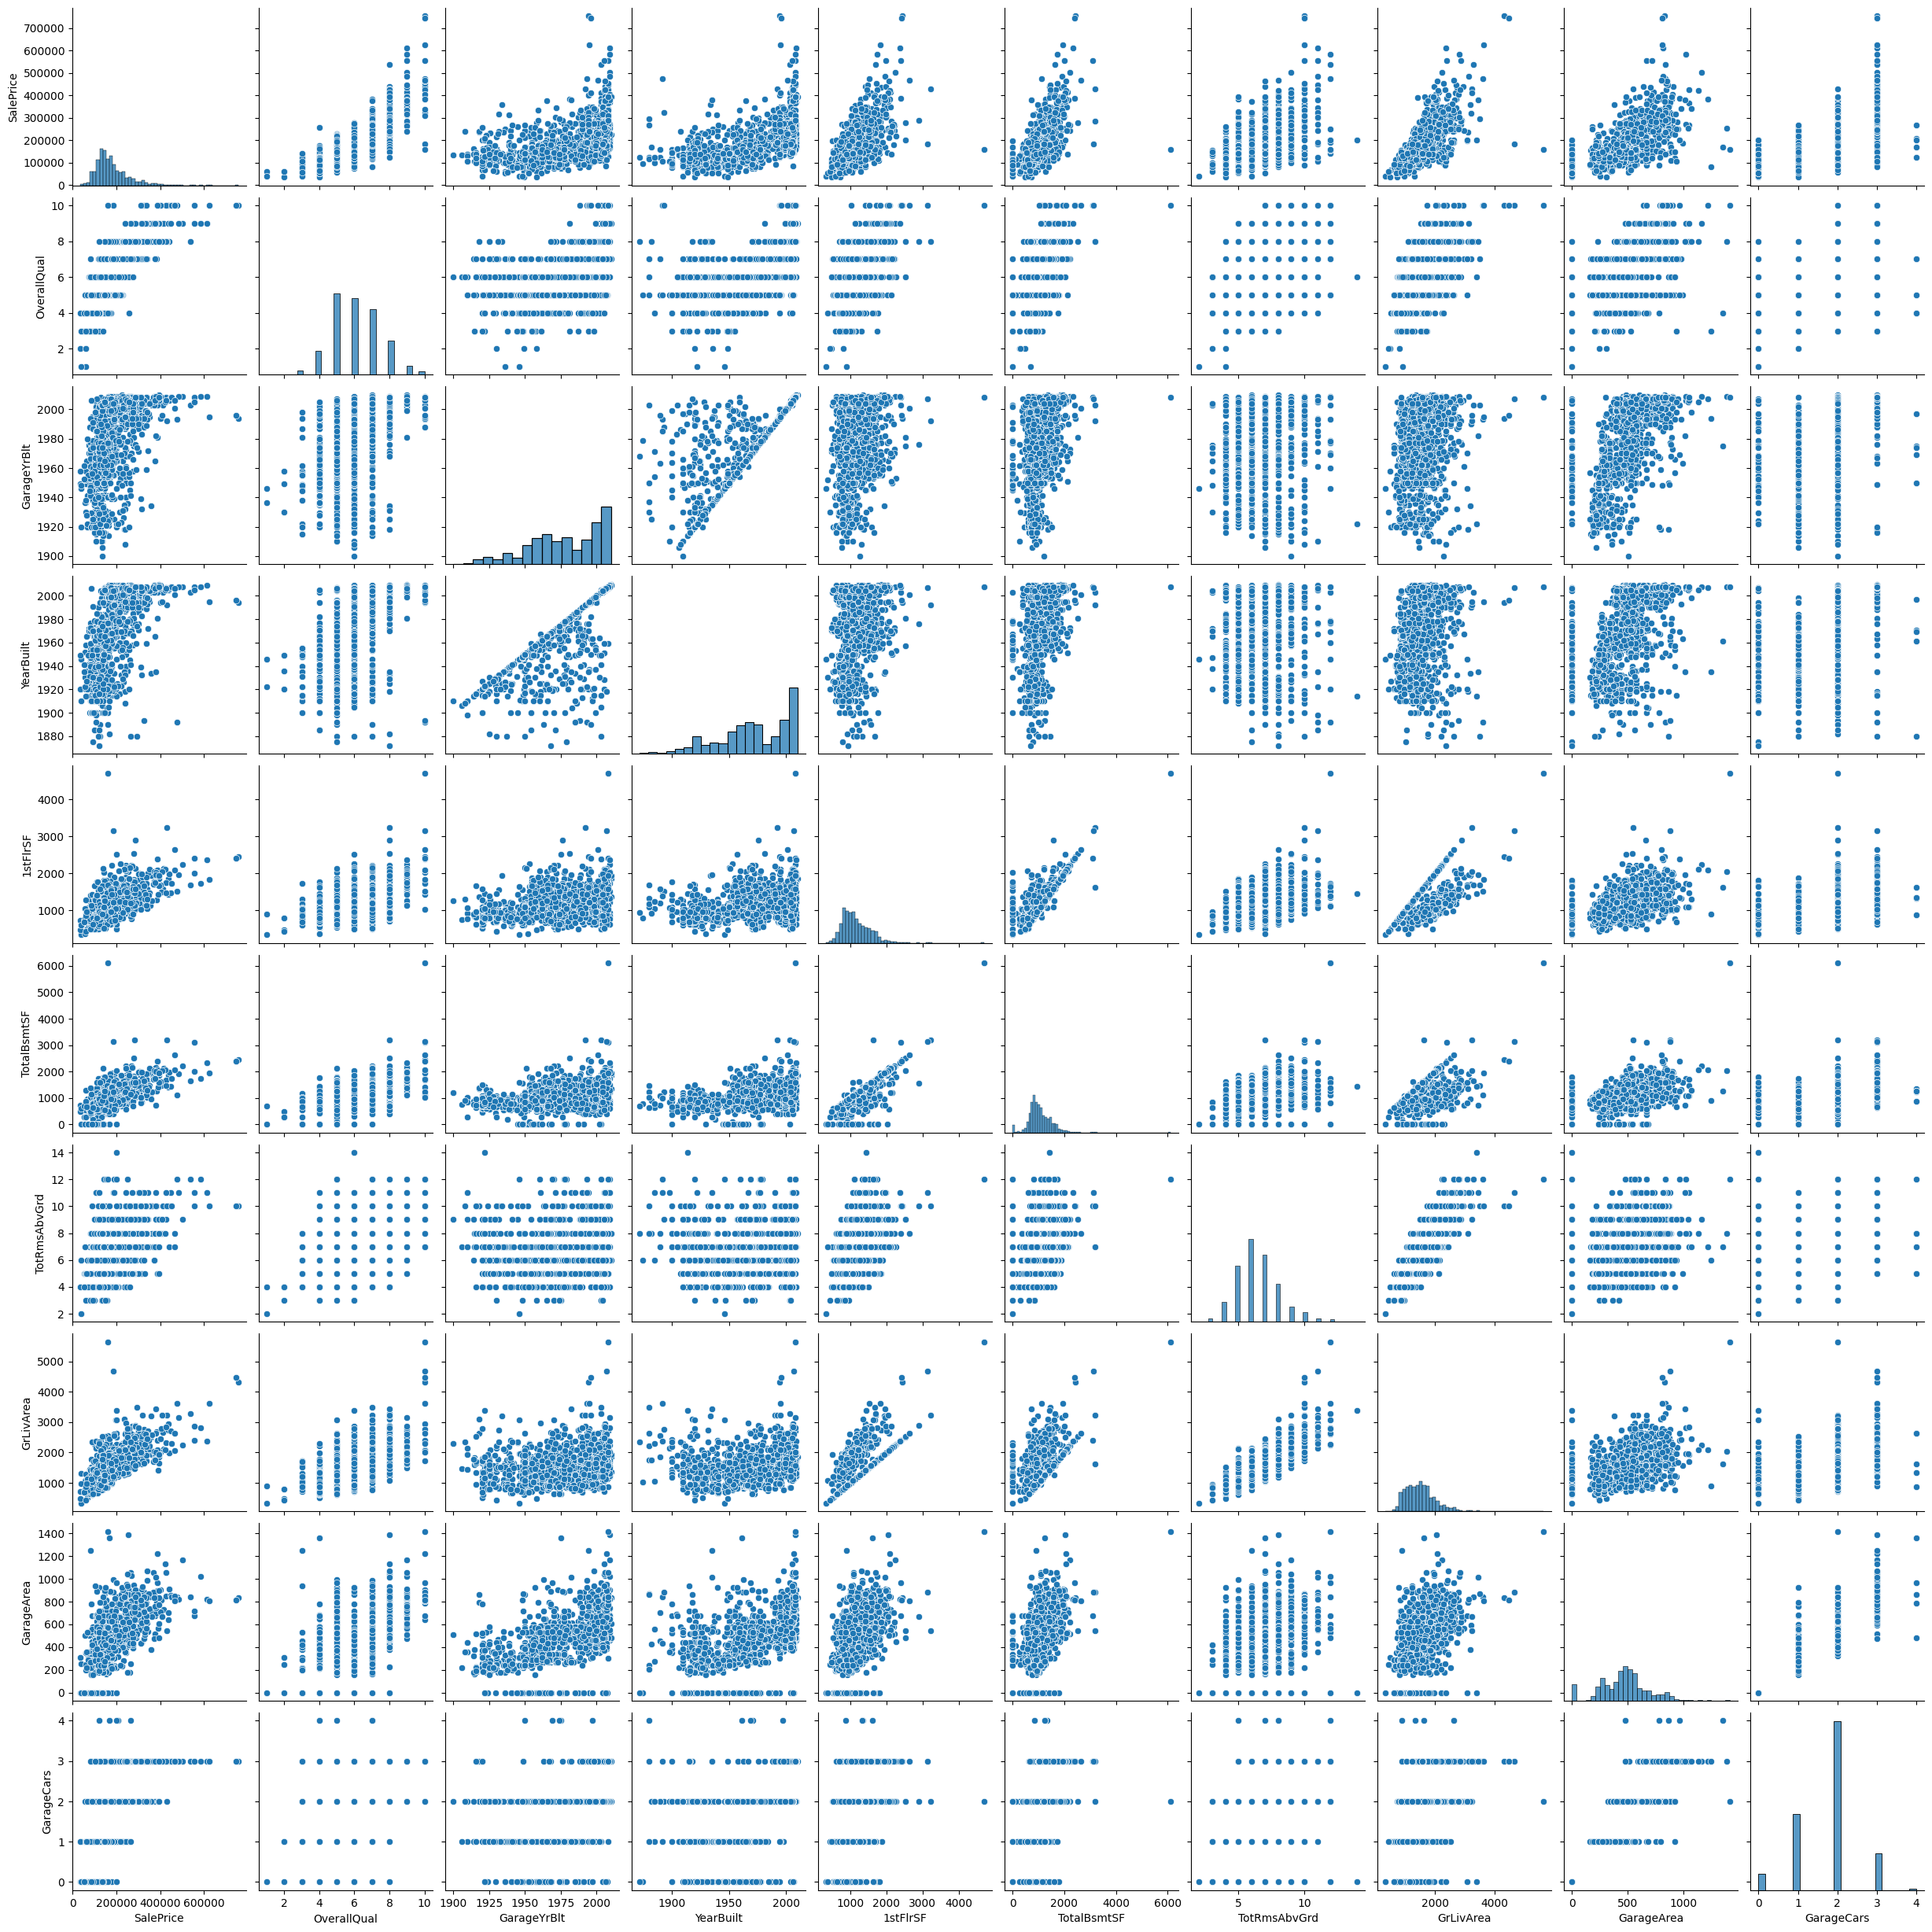

In [25]:
sns.pairplot(num_cor)

## EDA of Catogerical Variables

In [26]:
cato.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### checking the null values in catogerical data


In [44]:
cato.isnull().sum().sort_values(ascending=False).head(20)

MSZoning        0
KitchenQual     0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
Functiol        0
BsmtQual        0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PavedDrive      0
SaleType        0
BsmtCond        0
Foundation      0
dtype: int64

#### • Removing the columns which has more than 1000 null values

In [45]:
cato=cato.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

KeyError: "['PoolQC', 'MiscFeature', 'Alley', 'Fence'] not found in axis"

### removed the columns naming PoolQC , MiscFeature , Alley , Fence

In [46]:
cato.isnull().sum().sort_values(ascending=False).head(20)

MSZoning        0
KitchenQual     0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
Functiol        0
BsmtQual        0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PavedDrive      0
SaleType        0
BsmtCond        0
Foundation      0
dtype: int64

In [30]:
cat_null=cato.isnull().sum().sort_values(ascending=False).head(12)

In [47]:
for i in cat_null.index:
        un=cato[i].unique()
        print(Fore.GREEN,"Unique values for the column ",i,'is',un) 
        nun=cato[i].nunique()
        print(Fore.BLUE,"Number of unique values for the column ",i,'is',nun) 
        md=cato[i].mode()
        print(Fore.RED,"Mode for the column ",i,'is',md) 
        cato[i]=cato[i].fillna(cato[i].mode()[0]) 
# replacing all the null valueswithmode withthehelpofforloop

 Unique values for the column  FireplaceQu is ['Gd' 'TA' 'Fa' 'Ex' 'Po']
 Number of unique values for the column  FireplaceQu is 5
 Mode for the column  FireplaceQu is 0    Gd
Name: FireplaceQu, dtype: object
 Unique values for the column  GarageCond is ['TA' 'Fa' 'Gd' 'Po' 'Ex']
 Number of unique values for the column  GarageCond is 5
 Mode for the column  GarageCond is 0    TA
Name: GarageCond, dtype: object
 Unique values for the column  GarageQual is ['TA' 'Fa' 'Gd' 'Ex' 'Po']
 Number of unique values for the column  GarageQual is 5
 Mode for the column  GarageQual is 0    TA
Name: GarageQual, dtype: object
 Unique values for the column  GarageFinish is ['RFn' 'Unf' 'Fin']
 Number of unique values for the column  GarageFinish is 3
 Mode for the column  GarageFinish is 0    Unf
Name: GarageFinish, dtype: object
 Unique values for the column  GarageType is ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'Basment' '2Types']
 Number of unique values for the column  GarageType is 6
 Mode for the

 For column  MSZoning


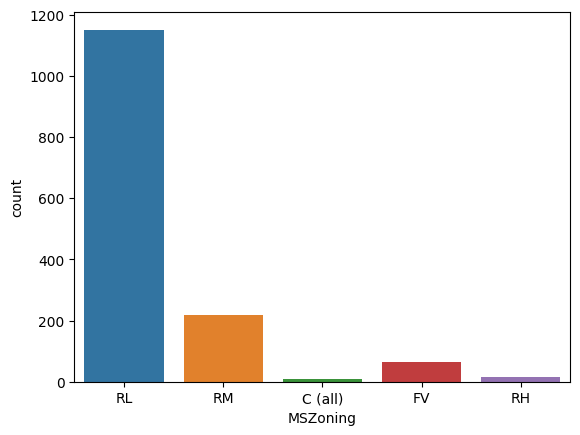

 For column  Street


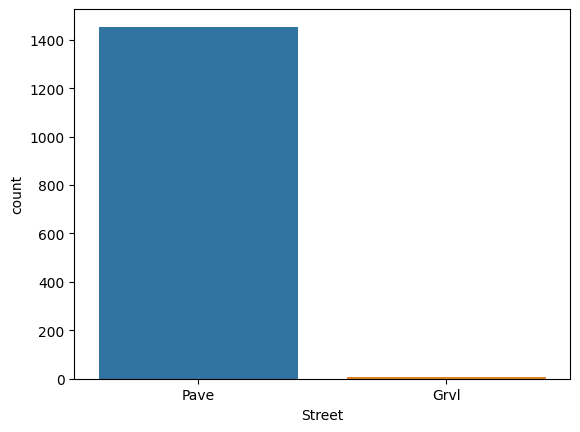

 For column  LotShape


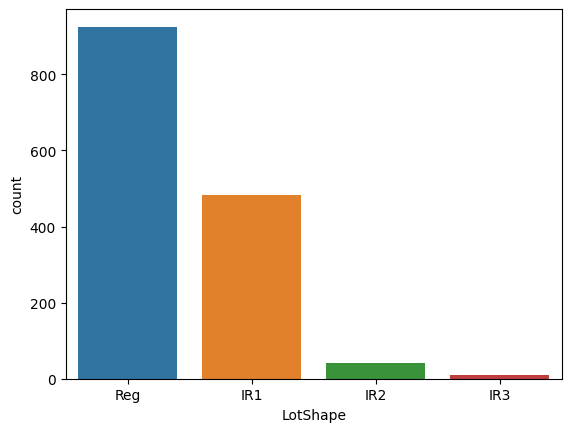

 For column  LandContour


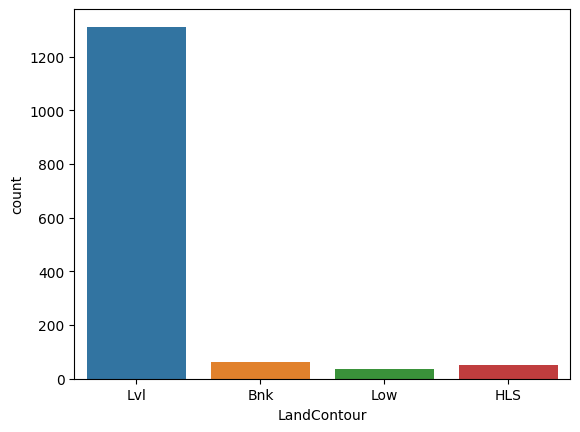

 For column  Utilities


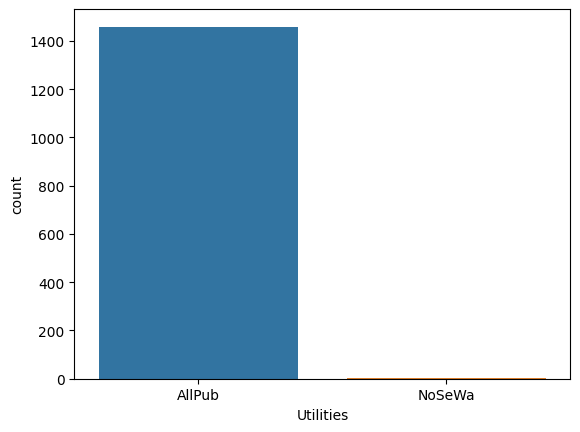

 For column  LotConfig


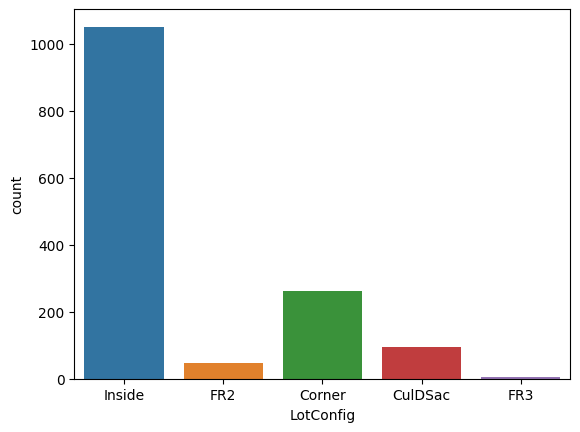

 For column  LandSlope


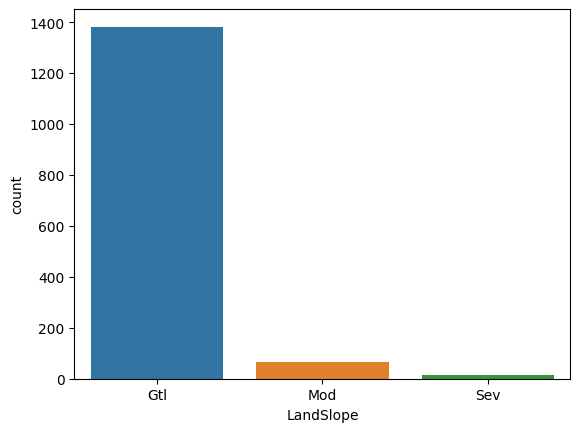

 For column  Condition1


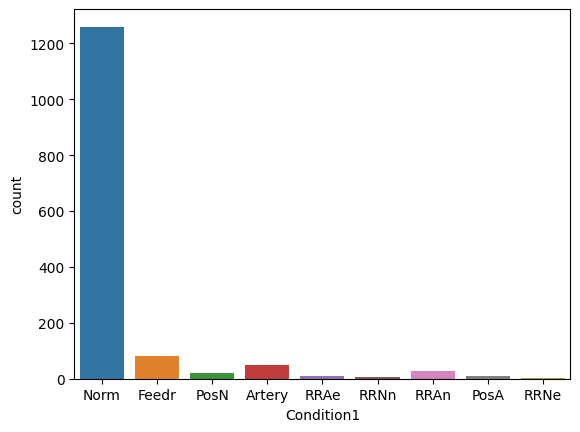

 For column  Condition2


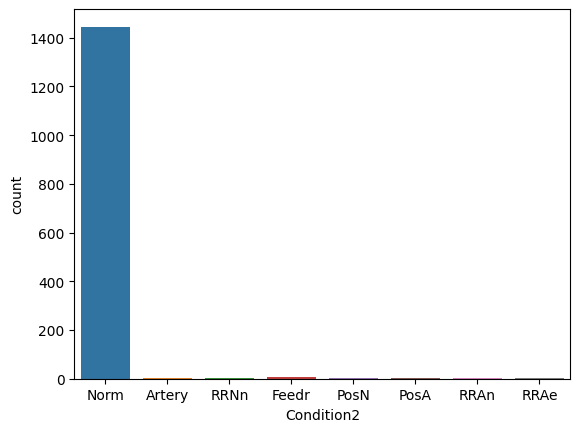

 For column  BldgType


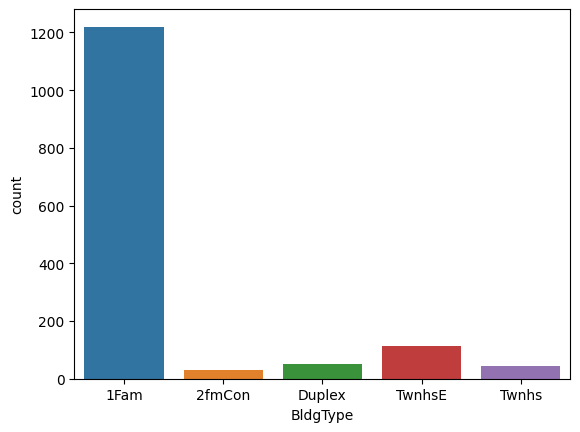

 For column  HouseStyle


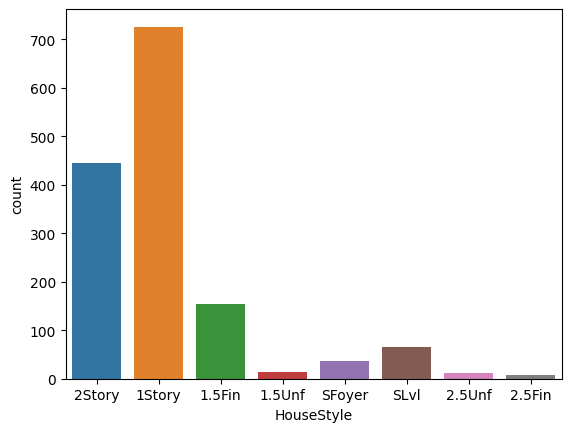

 For column  RoofStyle


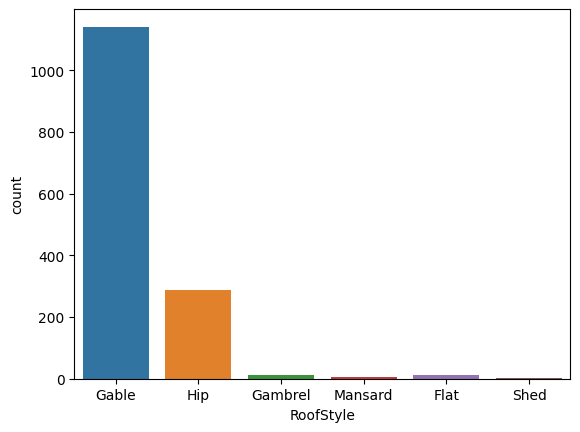

 For column  RoofMatl


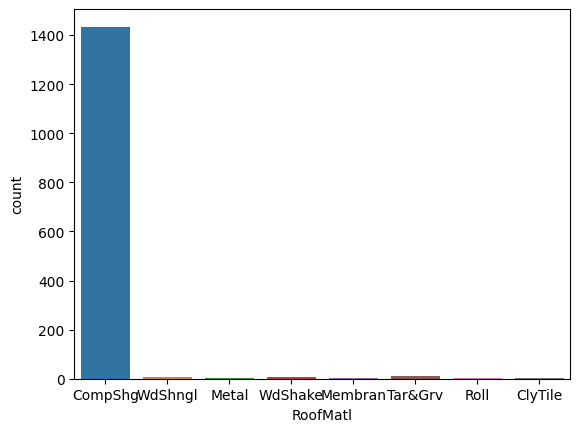

 For column  MasVnrType


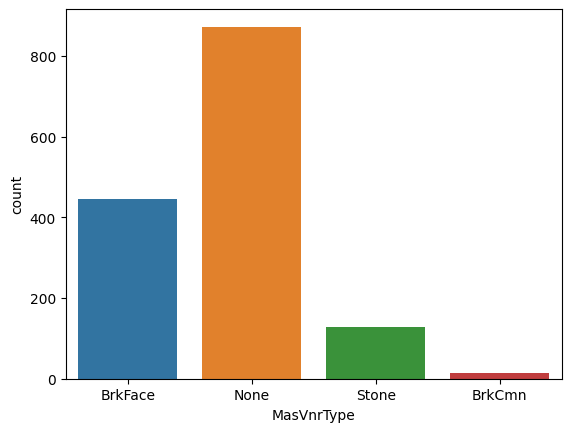

 For column  ExterQual


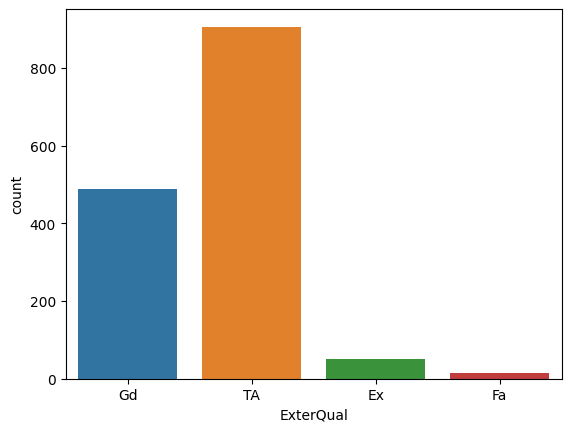

 For column  ExterCond


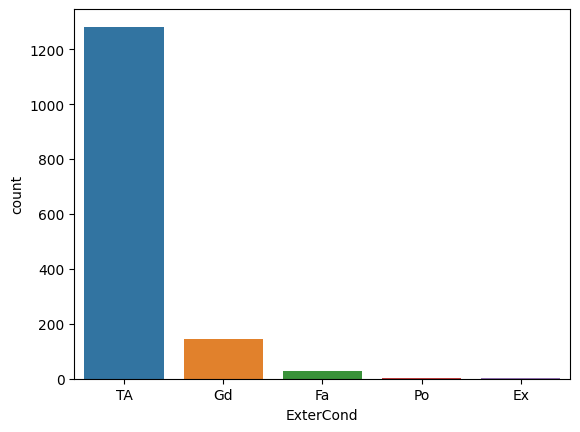

 For column  Foundation


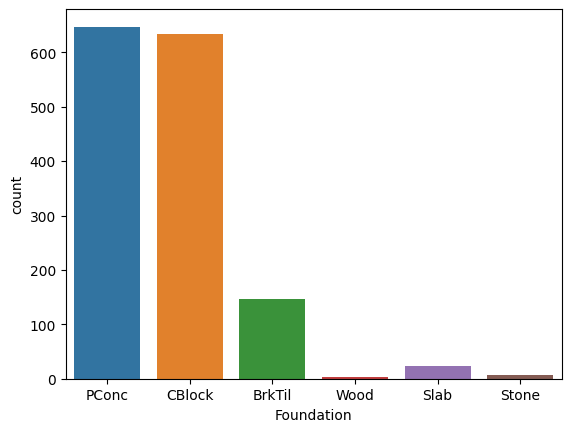

 For column  BsmtQual


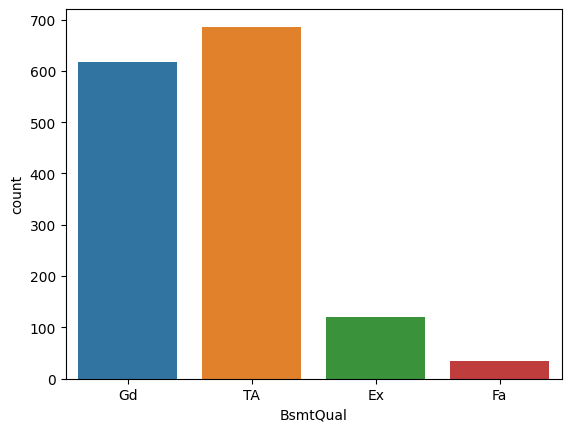

 For column  BsmtCond


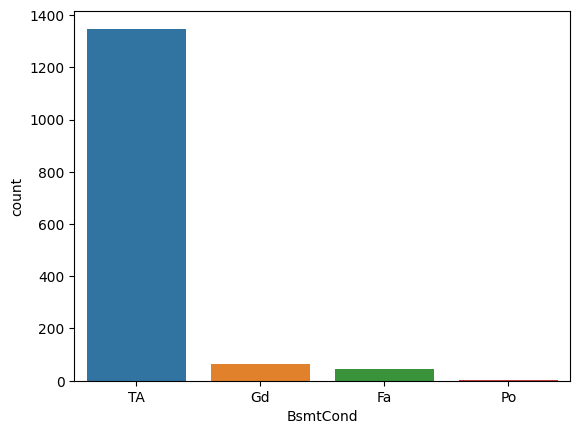

 For column  BsmtExposure


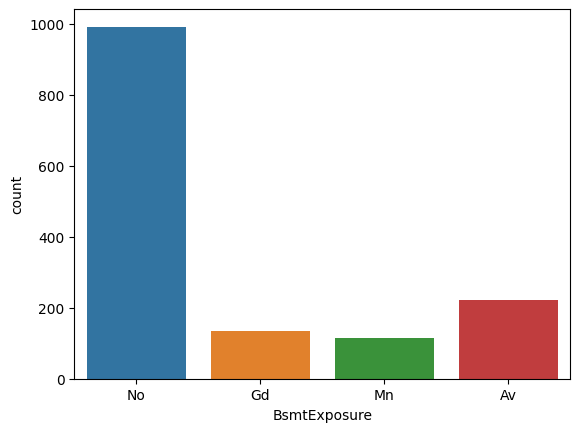

 For column  BsmtFinType1


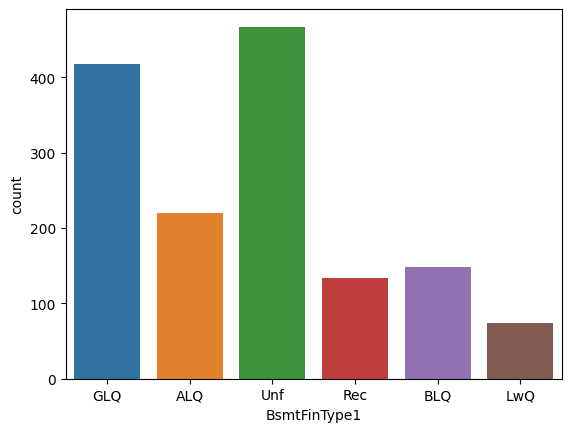

 For column  BsmtFinType2


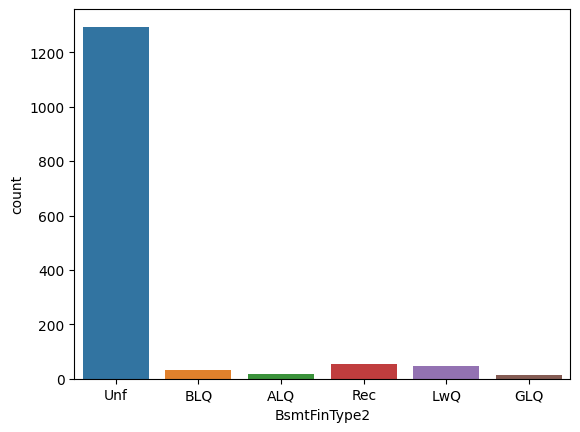

 For column  Heating


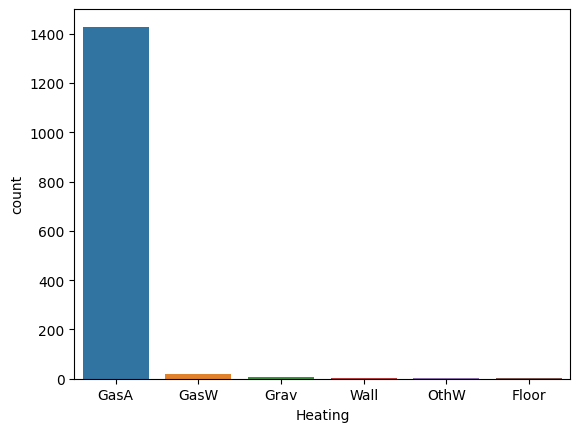

 For column  HeatingQC


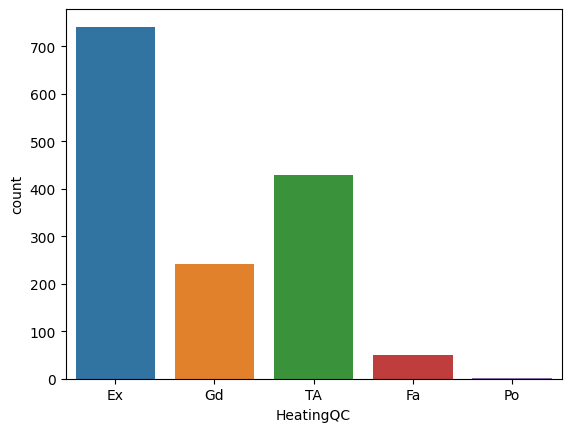

 For column  CentralAir


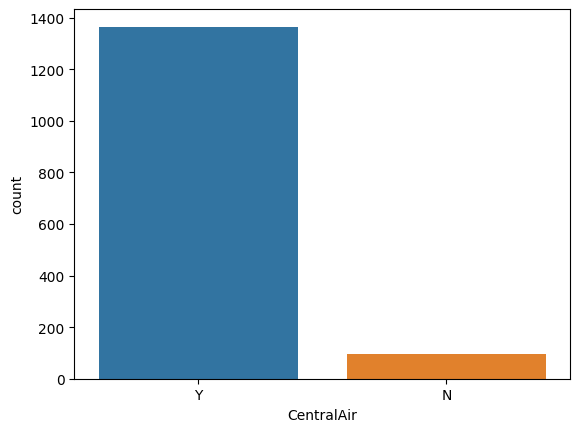

 For column  Electrical


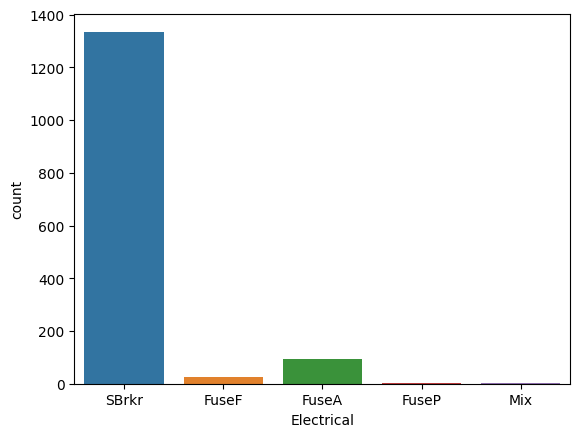

 For column  KitchenQual


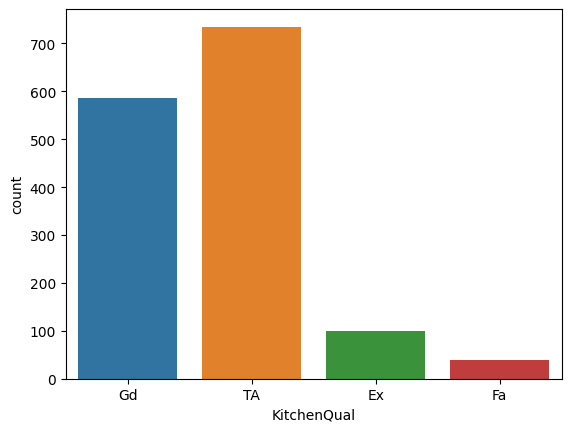

 For column  Functiol


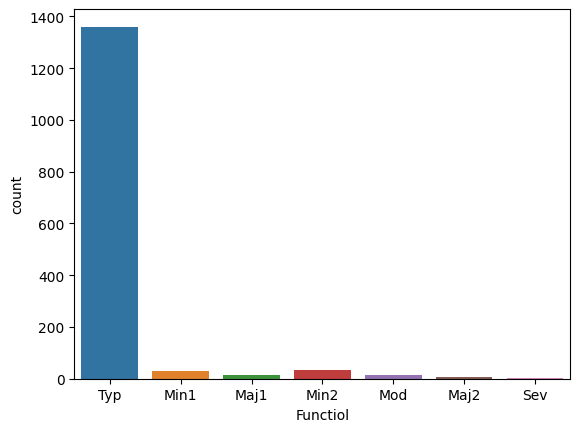

 For column  FireplaceQu


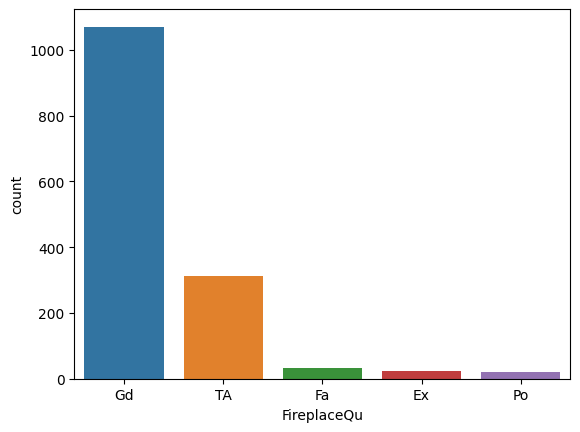

 For column  GarageType


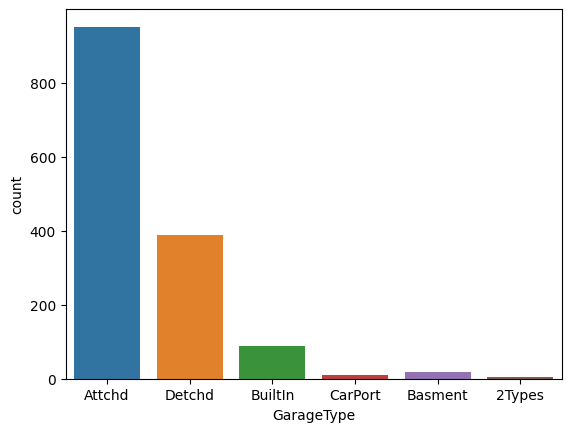

 For column  GarageFinish


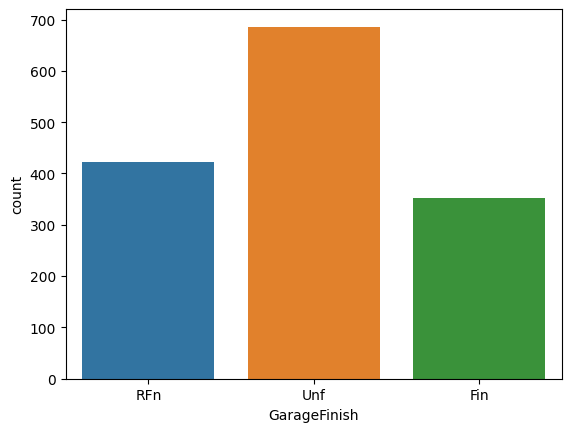

 For column  GarageQual


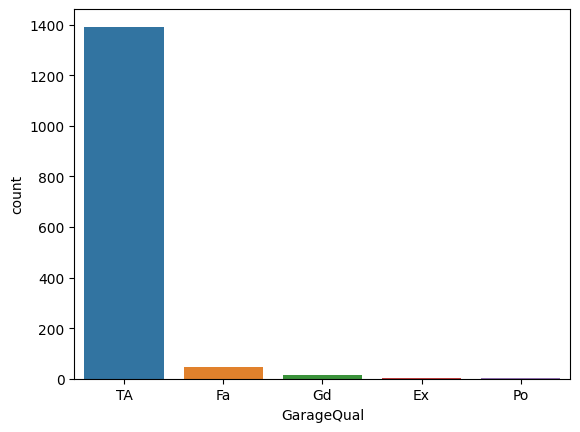

 For column  GarageCond


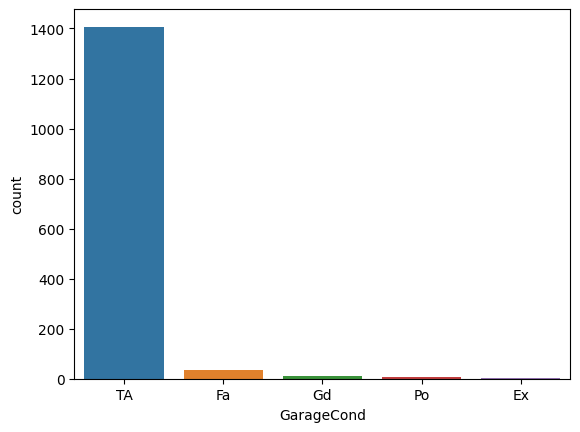

 For column  PavedDrive


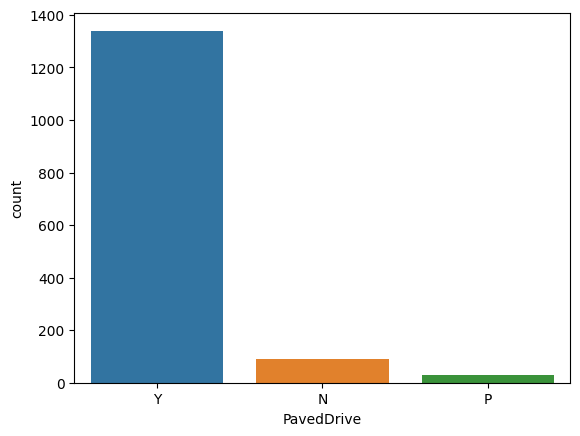

 For column  SaleType


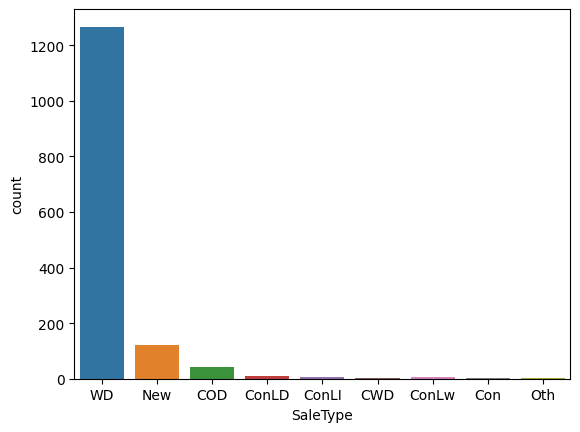

 For column  SaleCondition


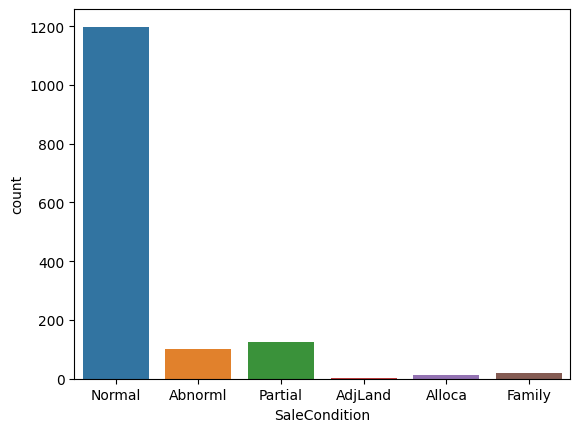

In [48]:
for i in cato.columns:
    if cato[i].nunique()<=5:
            print(Fore.RED,"For column ",i)
            sns.countplot(cato[i])
            plt.show()
    elif (cato[i].nunique()>5) and (cato[i].nunique()<=10): 
        print(Fore.BLUE,"For column ",i) 
        sns.countplot(cato[i])
        plt.show()

## boxplot for the variable mentioned below
* ’Street’, ’LotShape’,’SaleType’, ’SaleCondition’,’GarageType’*
* ’LotArea’,’YrSold’,’YearBuilt’, ’SalePrice’,’GarageArea’*

 Bivariate analysis between  Street LotArea


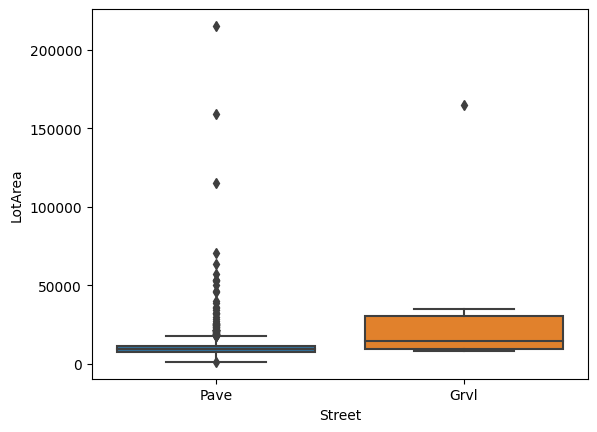

 Bivariate analysis between  LotShape YrSold


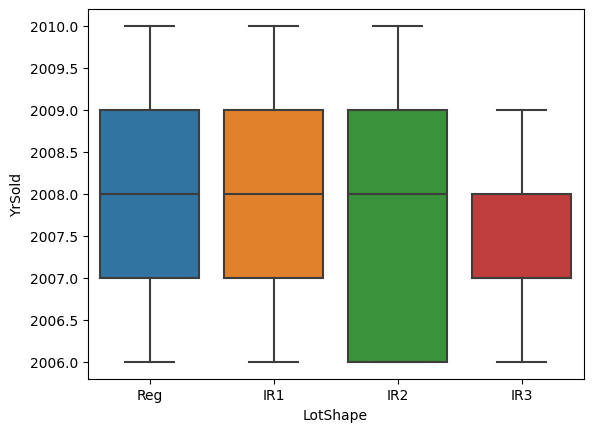

 Bivariate analysis between  SaleType YearBuilt


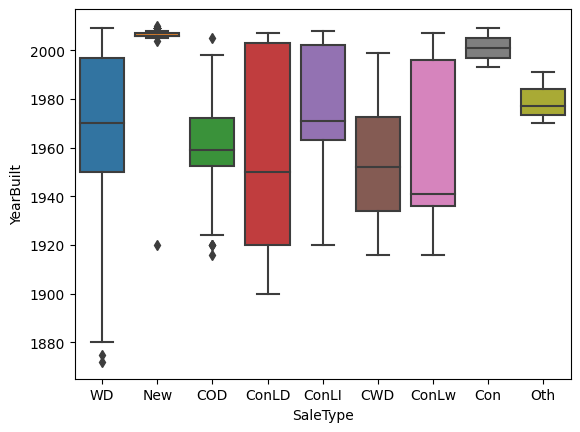

 Bivariate analysis between  SaleCondition SalePrice


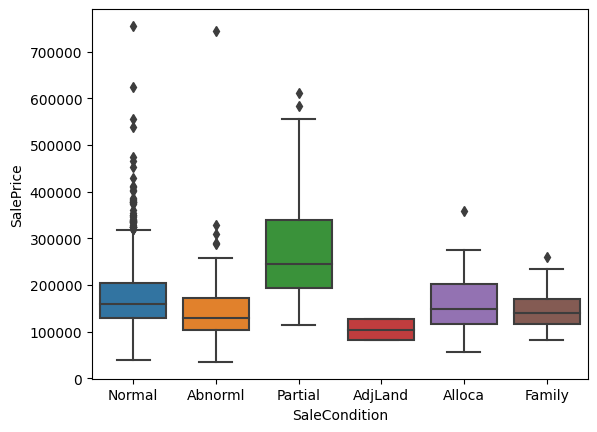

 Bivariate analysis between  GarageType GarageArea


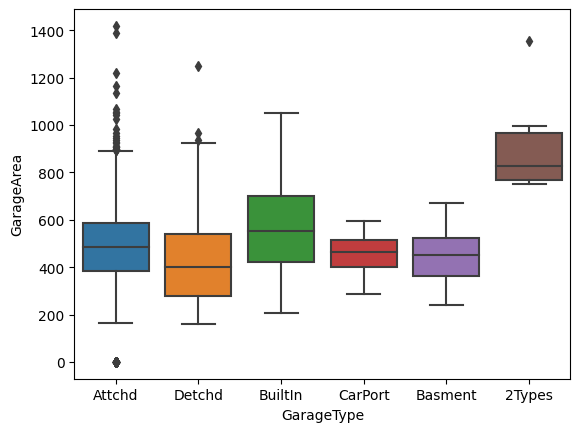

In [49]:
xax=['Street', 'LotShape','SaleType', 'SaleCondition','GarageType'] 
yax=['LotArea','YrSold','YearBuilt', 'SalePrice','GarageArea']
for i, a in zip(xax, yax):
    print(Fore.BLUE,'Bivariate analysis between ',i,a)
    sns.boxplot(x=cato[i],y=num[a])
    plt.show()

In [50]:
cato.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

# For instance here we are choosing the following variables for p value and chi-square value

### * Variable First SaleType, SaleCondition
### * Variable Second Street,LotShape

In [35]:
cr=pd.crosstab(cato['SaleType'],cato['SaleCondition']) 
print(Fore.BLUE,"First variable \n",cr) 
cr1=pd.crosstab(cato['Street'],cato['LotShape']) 
print(Fore.GREEN,"Second variable \n",cr1) 
cr2=pd.crosstab(cato['Neighborhood'],cato['SaleCondition']) 
print(Fore.RED,"Third variable \n",cr2)
cr3=pd.crosstab(cato['Condition1'],cato['Condition2']) 
print(Fore.CYAN,"Forth variable \n",cr3)

 First variable 
 SaleCondition  Abnorml  AdjLand  Alloca  Family  Normal  Partial
SaleType                                                        
COD                 24        0       0       0      19        0
CWD                  1        0       0       1       2        0
Con                  0        0       0       0       2        0
ConLD                2        0       0       0       6        1
ConLI                1        0       0       0       4        0
ConLw                0        0       0       0       5        0
New                  0        0       0       0       0      122
Oth                  3        0       0       0       0        0
WD                  70        4      12      19    1160        2
 Second variable 
 LotShape  IR1  IR2  IR3  Reg
Street                      
Grvl        1    1    0    4
Pave      483   40   10  921
 Third variable 
 SaleCondition  Abnorml  AdjLand  Alloca  Family  Normal  Partial
Neighborhood                                     

In [36]:
coef,p,dof,exp=stats.chi2_contingency(cr.values)
print(Fore.BLUE,"Coef is ",coef)
print(Fore.BLUE,Fore.BLUE,"P-value is ",p)
print(Fore.BLUE,"dof is ",dof)
print(Fore.BLUE,"expected is ",exp)
coef1,p1,dof1,exp1=stats.chi2_contingency(cr1.values)
print(Fore.GREEN,"Coef is ",coef1)
print(Fore.GREEN,"P-value is ",p1)
print(Fore.GREEN,"dof is ",dof1)
print(Fore.GREEN,"expected is ",exp1)
coef2,p2,dof2,exp2=stats.chi2_contingency(cr2.values)
print(Fore.RED,"Coef is ",coef2)
print(Fore.RED,"P-value is ",p2)
print(Fore.RED,"dof is ",dof2)
print(Fore.RED,"expected is ",exp2)
coef3,p3,dof3,exp3=stats.chi2_contingency(cr3.values)
print(Fore.CYAN,"Coef is ",coef3)
print(Fore.CYAN,"P-value is ",p3)
print(Fore.CYAN,"dof is ",dof3)
print(Fore.CYAN,"expected is ",exp3)

 Coef is  1652.6750772643866
  P-value is  0.0
 dof is  40
 expected is  [[2.97465753e+00 1.17808219e-01 3.53424658e-01 5.89041096e-01
  3.52835616e+01 3.68150685e+00]
 [2.76712329e-01 1.09589041e-02 3.28767123e-02 5.47945205e-02
  3.28219178e+00 3.42465753e-01]
 [1.38356164e-01 5.47945205e-03 1.64383562e-02 2.73972603e-02
  1.64109589e+00 1.71232877e-01]
 [6.22602740e-01 2.46575342e-02 7.39726027e-02 1.23287671e-01
  7.38493151e+00 7.70547945e-01]
 [3.45890411e-01 1.36986301e-02 4.10958904e-02 6.84931507e-02
  4.10273973e+00 4.28082192e-01]
 [3.45890411e-01 1.36986301e-02 4.10958904e-02 6.84931507e-02
  4.10273973e+00 4.28082192e-01]
 [8.43972603e+00 3.34246575e-01 1.00273973e+00 1.67123288e+00
  1.00106849e+02 1.04452055e+01]
 [2.07534247e-01 8.21917808e-03 2.46575342e-02 4.10958904e-02
  2.46164384e+00 2.56849315e-01]
 [8.76486301e+01 3.47123288e+00 1.04136986e+01 1.73561644e+01
  1.03963425e+03 1.08476027e+02]]
 Coef is  4.665898103251134
 P-value is  0.19796136612247495
 dof is  3

In [37]:
if p<0.05:
    print(Fore.GREEN,"For the First variable it is Alternate hypo-------------->relation exist") 
else:
    print(Fore.RED,"For the First variable it is Null hypo-------------->no␣ ,→relation exist")
if p1<0.05:
    print(Fore.GREEN,"For the Second variable it is Alternate hypo-------------->relation exist") 
else:     
    print(Fore.RED,"For the Second variable it is Null hypo-------------->no relation exist")
    
if p2<0.05:
    print(Fore.GREEN,"For the Third variable it is Alternatehypo-------------->relation exist") 
else:
    print(Fore.RED,"For the Third variable it is Null hypo-------------->norelation exist")
if p3<0.05:
    print(Fore.GREEN,"For the Forth variable it is Alternate␣hypo-------------->relation exist") 
else:
    print(Fore.RED,"For the Forth variable it is Null hypo-------------->norelation exist")

 For the First variable it is Alternate hypo-------------->relation exist
 For the Second variable it is Null hypo-------------->no relation exist
 For the Third variable it is Alternatehypo-------------->relation exist
 For the Forth variable it is Alternate␣hypo-------------->relation exist


In [39]:
num.columns


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [88]:

cato=pd.get_dummies(cato,drop_first='True')
cato.head(5)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_mes,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functiol_Maj2,Functiol_Min1,Functiol_Min2,Functiol_Mod,Functiol_Sev,Functiol_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0

In [87]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [106]:
cato.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=200)

In [115]:
final = pd.concat([num[['SalePrice','OverallQual','GarageYrBlt','YearBuilt','1stFlrSF','TotalBsmtSF','TotRmsAbvGrd', 'GrLivArea', 'GarageArea' ,'GarageCars']], cato[['SaleType_CWD','SaleType_Con','SaleType_ConLD','SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD','SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial']]], axis=1)

In [116]:
final.head()

,SalePrice,OverallQual,GarageYrBlt,YearBuilt,1stFlrSF,TotalBsmtSF,TotRmsAbvGrd,GrLivArea,GarageArea,GarageCars,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,7,2003.0,2003,856,856,8,1710,548,2,0,0,0,0,0,0,0,1,0,0,0,1,0
1,181500,6,1976.0,1976,1262,1262,6,1262,460,2,0,0,0,0,0,0,0,1,0,0,0,1,0
2,223500,7,2001.0,2001,920,920,6,1786,608,2,0,0,0,0,0,0,0,1,0,0,0,1,0
3,140000,7,1998.0,1915,961,756,7,1717,642,3,0,0,0,0,0,0,0,1,0,0,0,0,0
4,250000,8,2000.0,2000,1145,1145,9,2198,836,3,0,0,0,0,0,0,0,1,0,0,0,1,0


In [109]:
final.isnull().sum()


SalePrice                0
OverallQual              0
GarageYrBlt              0
YearBuilt                0
1stFlrSF                 0
TotalBsmtSF              0
TotRmsAbvGrd             0
GrLivArea                0
GarageArea               0
GarageCars               0
SaleType_CWD             0
SaleType_Con             0
SaleType_ConLD           0
SaleType_ConLI           0
SaleType_ConLw           0
SaleType_New             0
SaleType_Oth             0
SaleType_WD              0
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
dtype: int64

### Boxplot for finding the outliers in final variable

 For the column SalePrice


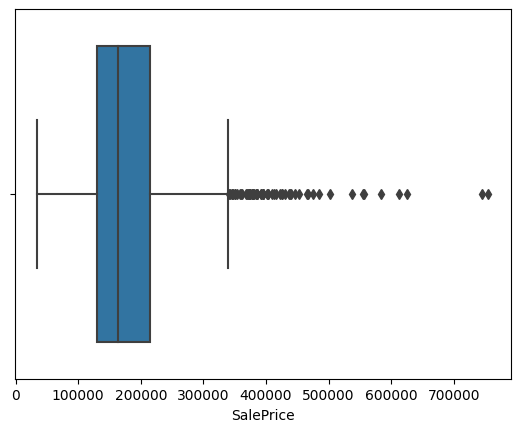

 For the column OverallQual


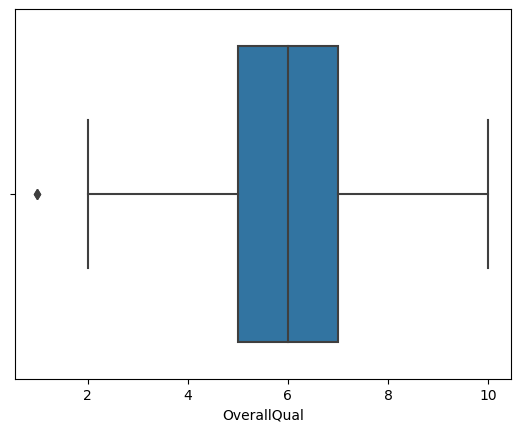

 For the column GarageYrBlt


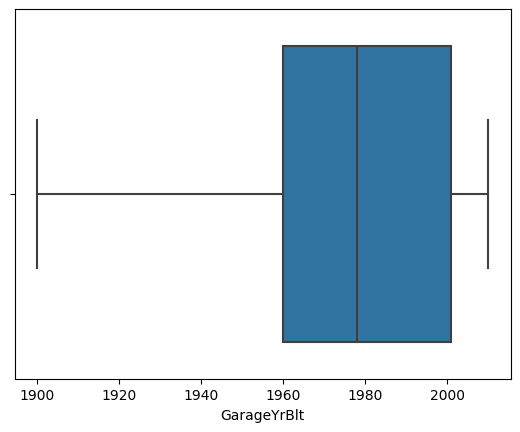

 For the column YearBuilt


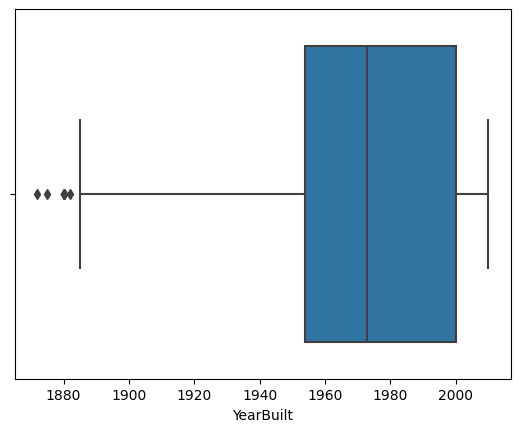

 For the column 1stFlrSF


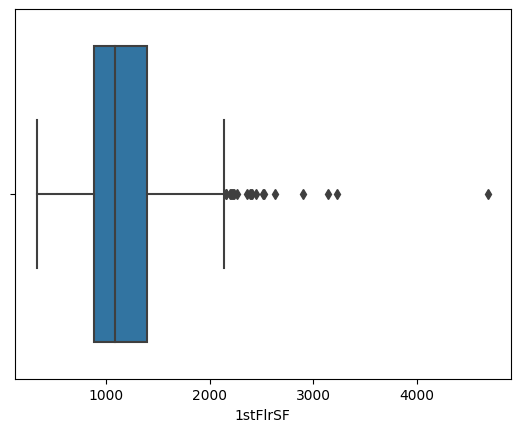

 For the column TotalBsmtSF


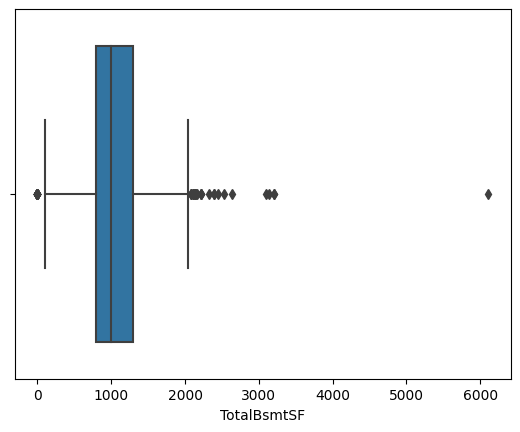

 For the column TotRmsAbvGrd


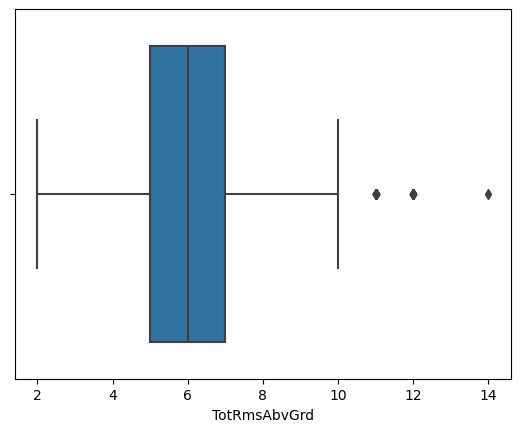

 For the column GrLivArea


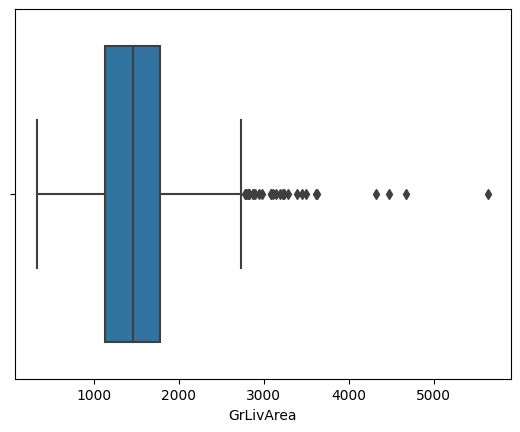

 For the column GarageArea


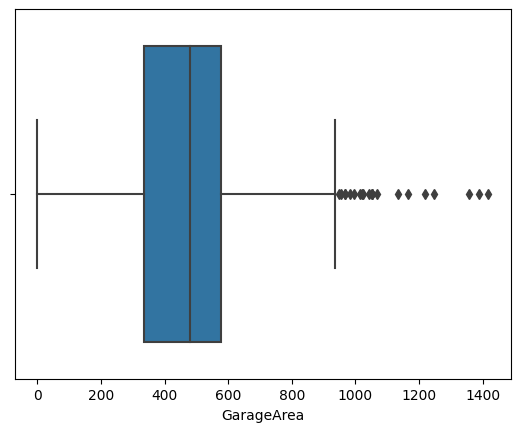

 For the column GarageCars


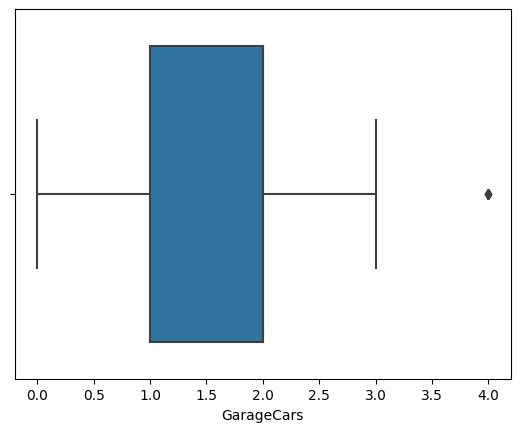

 For the column SaleType_CWD


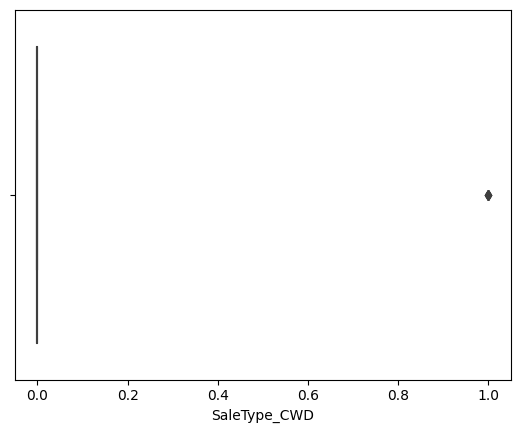

 For the column SaleType_Con


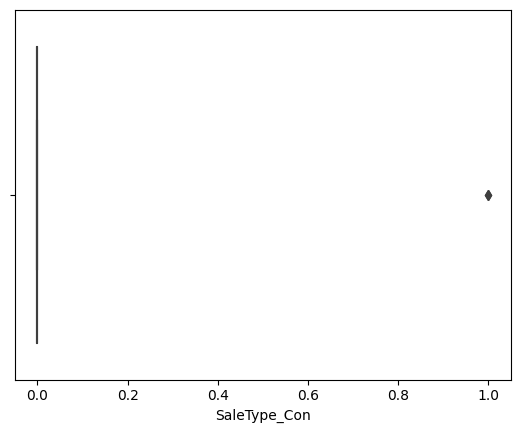

 For the column SaleType_ConLD


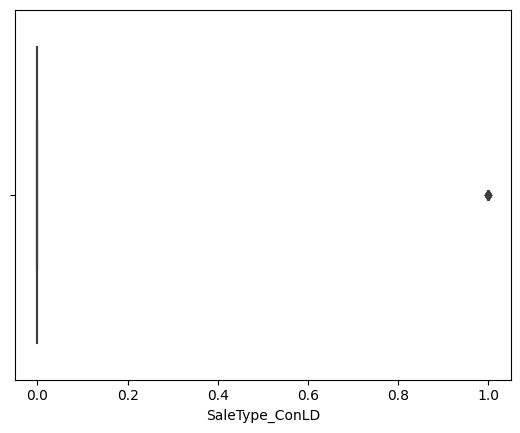

 For the column SaleType_ConLI


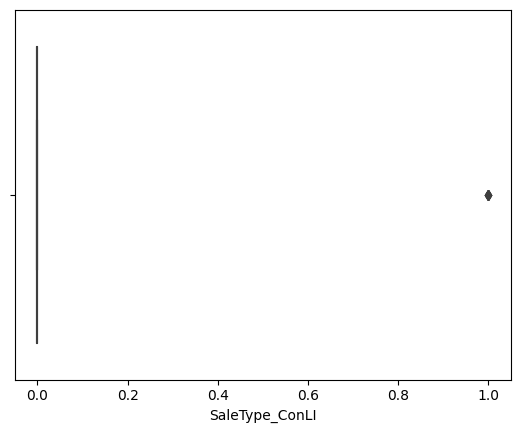

 For the column SaleType_ConLw


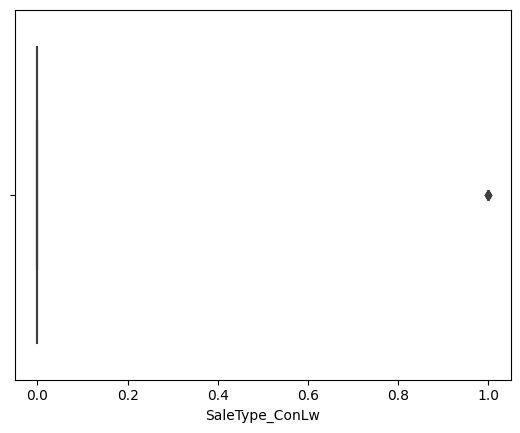

 For the column SaleType_New


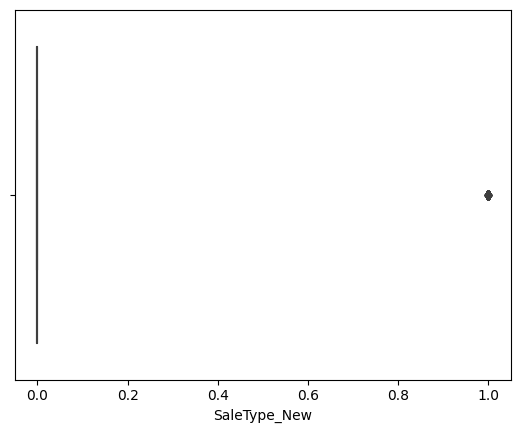

 For the column SaleType_Oth


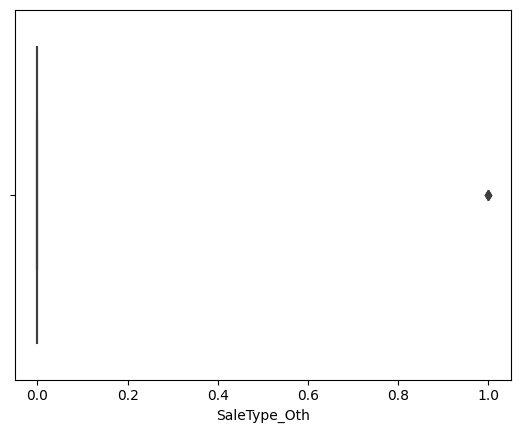

 For the column SaleType_WD


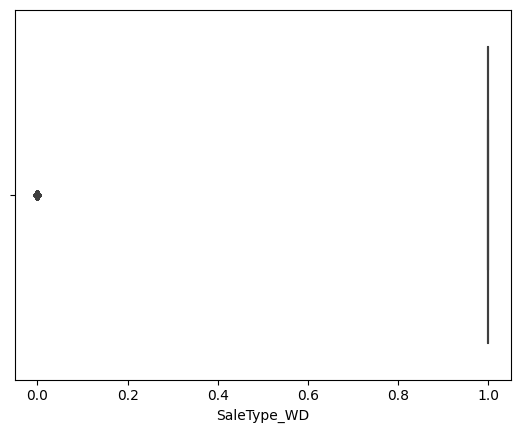

 For the column SaleCondition_AdjLand


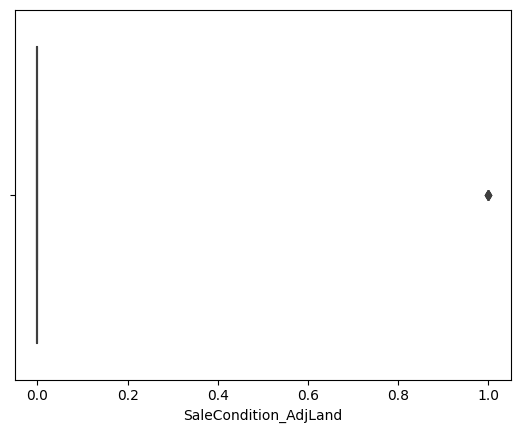

 For the column SaleCondition_Alloca


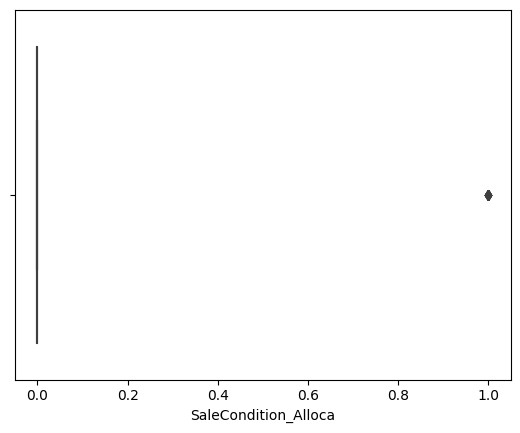

 For the column SaleCondition_Family


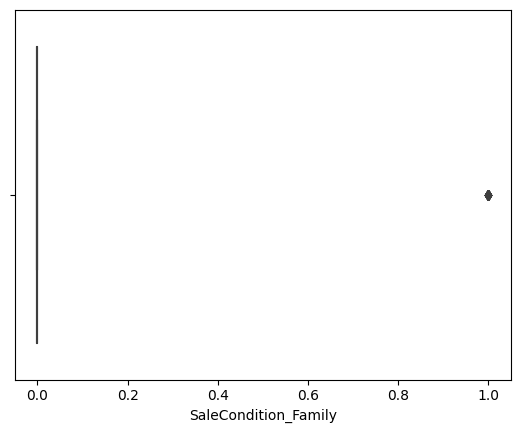

 For the column SaleCondition_Normal


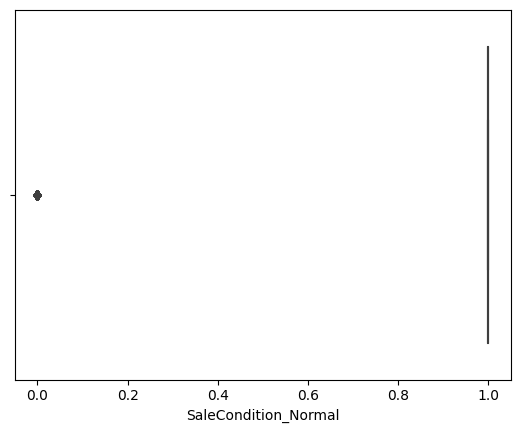

 For the column SaleCondition_Partial


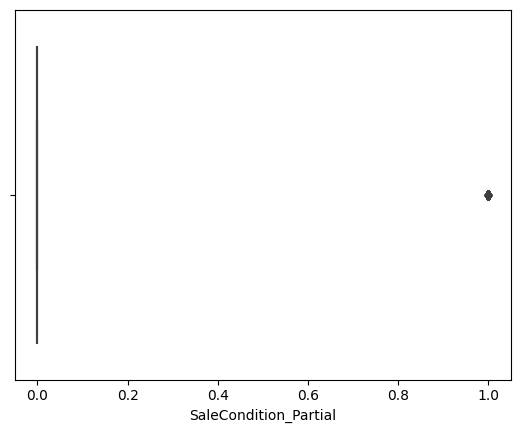

In [117]:
final_num=final.select_dtypes(include=np.number) 
for i in final_num.columns:
    print(Fore.BLUE,'For the column',i)
    sns.boxplot(final_num[i])
    plt.show()
    print(Fore.RED,'========================================')

In [118]:
for i in final_num.columns: 
    q1=final_num[i].quantile(0.25)
    q3=final_num[i].quantile(0.75)
    iqr=q3-q1
    UB= q3+1.5*iqr
    LB =q1-1.5*iqr
    print("For column ",i," Lower Bond is",LB," Upper bond is",UB)
    final_num.loc[final_num[i] > UB, 'Upper Bound in col'] = i
    final_num.loc[final_num[i] < LB, 'Lower Bound in col'] = i

For column  SalePrice  Lower Bond is 3937.5  Upper bond is 340037.5
For column  OverallQual  Lower Bond is 2.0  Upper bond is 10.0
For column  GarageYrBlt  Lower Bond is 1898.5  Upper bond is 2062.5
For column  YearBuilt  Lower Bond is 1885.0  Upper bond is 2069.0
For column  1stFlrSF  Lower Bond is 118.125  Upper bond is 2155.125
For column  TotalBsmtSF  Lower Bond is 42.0  Upper bond is 2052.0
For column  TotRmsAbvGrd  Lower Bond is 2.0  Upper bond is 10.0
For column  GrLivArea  Lower Bond is 158.625  Upper bond is 2747.625
For column  GarageArea  Lower Bond is -27.75  Upper bond is 938.25
For column  GarageCars  Lower Bond is -0.5  Upper bond is 3.5
For column  SaleType_CWD  Lower Bond is 0.0  Upper bond is 0.0
For column  SaleType_Con  Lower Bond is 0.0  Upper bond is 0.0
For column  SaleType_ConLD  Lower Bond is 0.0  Upper bond is 0.0
For column  SaleType_ConLI  Lower Bond is 0.0  Upper bond is 0.0
For column  SaleType_ConLw  Lower Bond is 0.0  Upper bond is 0.0
For column  SaleTy

In [119]:
#final_num["Upper Bound in col"]=final_num["Upper Bound in col"].fillna("False")
#final_num["Lower Bound in col"]=final_num["Lower Bound in col"].fillna("False")

In [124]:
final_num.head(10)

,SalePrice,OverallQual,GarageYrBlt,YearBuilt,1stFlrSF,TotalBsmtSF,TotRmsAbvGrd,GrLivArea,GarageArea,GarageCars,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Upper Bound in col,Lower Bound in col
0,208500,7,2003.0,2003,856,856,8,1710,548,2,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,NaN
1,181500,6,1976.0,1976,1262,1262,6,1262,460,2,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,NaN
2,223500,7,2001.0,2001,920,920,6,1786,608,2,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,NaN
3,140000,7,1998.0,1915,961,756,7,1717,642,3,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,SaleCondition_Normal
4,250000,8,2000.0,2000,1145,1145,9,2198,836,3,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,NaN
5,143000,5,1993.0,1993,796,796,5,1362,480,2,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,NaN
6,307000,8,2004.0,2004,1694,1686,7,1694,636,2,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,NaN
7,200000,7,1973.0,1973,1107,1107,7,2090,484,2,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,NaN
8,129900,7,1931.0,1931,1022,952,8,1774,468,2,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,SaleCondition_Normal
9,118000,5,1939.0,1939,1077,991,5,1077,205,1,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,NaN


In [126]:
final_num.columns

Index(['SalePrice', 'OverallQual', 'GarageYrBlt', 'YearBuilt', '1stFlrSF',
       'TotalBsmtSF', 'TotRmsAbvGrd', 'GrLivArea', 'GarageArea', 'GarageCars',
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'Upper Bound in col',
       'Lower Bound in col'],
      dtype='object')

In [132]:
final_num=final_num.drop(['Upper Bound in col'], axis=1)
final_num=final_num.drop(['Lower Bound in col'], axis=1)


In [133]:
final_num.head()

,SalePrice,OverallQual,GarageYrBlt,YearBuilt,1stFlrSF,TotalBsmtSF,TotRmsAbvGrd,GrLivArea,GarageArea,GarageCars,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,7,2003.0,2003,856,856,8,1710,548,2,0,0,0,0,0,0,0,1,0,0,0,1,0
1,181500,6,1976.0,1976,1262,1262,6,1262,460,2,0,0,0,0,0,0,0,1,0,0,0,1,0
2,223500,7,2001.0,2001,920,920,6,1786,608,2,0,0,0,0,0,0,0,1,0,0,0,1,0
3,140000,7,1998.0,1915,961,756,7,1717,642,3,0,0,0,0,0,0,0,1,0,0,0,0,0
4,250000,8,2000.0,2000,1145,1145,9,2198,836,3,0,0,0,0,0,0,0,1,0,0,0,1,0


In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X=final_num.drop('SalePrice',axis=1)
y=final_num.pop('SalePrice')

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [137]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 22)
(438, 22)
(1022,)
(438,)


In [138]:
from sklearn.linear_model import LinearRegression

In [151]:
lm=LinearRegression()

In [152]:
lm_model=lm.fit(X_train,y_train)

In [153]:
prediction_x_train=lm_model.predict(X_train)

In [154]:
prediction_x_train[:5]

array([181532.30269265, 228443.06717195, 123602.36092146, 208294.20639044,
        69940.47684745])

In [150]:
y_train[:5]

632      82500
208     277000
83      126500
1174    239000
250      76500
Name: SalePrice, dtype: int64

In [157]:
predict_test=lm_model.predict(X_test)
predict_test[:5]

array([215491.14354011, 160651.72241946, 112059.02376534,  53164.57678634,
       122418.35529204])

In [158]:
y_test[:5]

258     231500
267     179500
288     122000
649      84500
1233    142000
Name: SalePrice, dtype: int64

In [160]:
X_train.columns

Index(['OverallQual', 'GarageYrBlt', 'YearBuilt', '1stFlrSF', 'TotalBsmtSF',
       'TotRmsAbvGrd', 'GrLivArea', 'GarageArea', 'GarageCars', 'SaleType_CWD',
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')

In [163]:
final_num.head()

,OverallQual,GarageYrBlt,YearBuilt,1stFlrSF,TotalBsmtSF,TotRmsAbvGrd,GrLivArea,GarageArea,GarageCars,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,2003.0,2003,856,856,8,1710,548,2,0,0,0,0,0,0,0,1,0,0,0,1,0
1,6,1976.0,1976,1262,1262,6,1262,460,2,0,0,0,0,0,0,0,1,0,0,0,1,0
2,7,2001.0,2001,920,920,6,1786,608,2,0,0,0,0,0,0,0,1,0,0,0,1,0
3,7,1998.0,1915,961,756,7,1717,642,3,0,0,0,0,0,0,0,1,0,0,0,0,0
4,8,2000.0,2000,1145,1145,9,2198,836,3,0,0,0,0,0,0,0,1,0,0,0,1,0


In [169]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
print("R2 score train data",lm_model.score(X_train,y_train))
print("MAE Score train data",mean_absolute_error(y_train,prediction_x_train))
print("MSE Score train data",mean_squared_error(y_train,prediction_x_train))

R2 score train data 0.7533716177980381
MAE Score train data 23785.28706797948
MSE Score train data 1467112354.8963714


In [171]:
print("R2 score test data",lm_model.score(X_test,y_test))
print("MAE Score test data",mean_absolute_error(y_test,predict_test))
print("MSE Score test data",mean_squared_error(y_test,predict_test))

R2 score test data 0.8154846980691158
MAE Score test data 24772.281049359895
MSE Score test data 1317495131.2038271


In [172]:
new=[[6,2023,2022,900,1500,6,1000,650,3,0,0,0,0,1,0,0,0,0,0,0,0,1]]

In [173]:
new_predict=lm_model.predict(new)

In [174]:
new_predict

array([163456.70793091])